# Import from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/20221/data_science/data")

In [ ]:
!ls

test_data_90mins.csv  test_data_total.csv    train_data_games.csv
test_data_games.csv   train_data_90mins.csv  train_data_total.csv


# Import library

In [ ]:
! pip install skfeature-chappers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 KB 3.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from dython import nominal


# analyse library
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.cluster import KMeans
from scipy import stats


# import model
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.tree import DecisionTreeRegressor

# evaluation metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse


from IPython.display import display
from skfeature.function.similarity_based import fisher_score
from sklearn.metrics import mutual_info_score

# Read data

In [ ]:
df_train = pd.read_csv("train_data_games.csv", index_col = 'ID')

position_convt_dict = {
    'FW': "Striker", 
    'AML': "Wide Midfielder", 
    'AMC': "Attacking Midfielder", 
    'AMR': "Wide Midfielder",
    'ML': "Wide Midfielder",
    'MC': "Holding Midfielder",
    'MR': "Wide Midfielder",
    'DMC': "Holding Midfielder",
    'DL': "Full Back",
    'DC': "Centre Back",
    'DR': "Full Back",
    'GK': "Goalkeeper"
}

df_train['positionGeneral'] = df_train.positionCode.replace(position_convt_dict)


In [ ]:
df_total = pd.read_csv("test_data_total.csv", index_col = 'ID')

In [ ]:
df_test = pd.read_csv("test_data_games.csv", index_col = 'ID')

# Visualization

## Visualize general position

In [ ]:
"""sns.set(rc={"figure.figsize":(10, 4)}) 
sns.catplot(data = df, x = "positionGeneral", kind = "count")"""


'sns.set(rc={"figure.figsize":(10, 4)}) \nsns.catplot(data = df, x = "positionGeneral", kind = "count")'

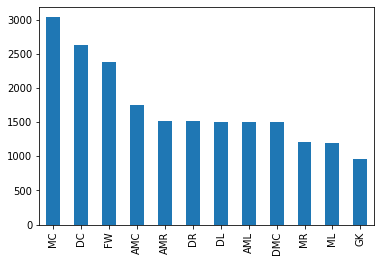

In [ ]:
df_total['positionCode'].value_counts().plot(kind='bar')

[Text(0, 0.5, '')]

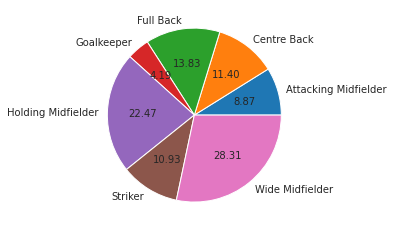

In [ ]:
sns.set_style("whitegrid")
pie_chart_pos = df_train.groupby('positionGeneral').size().plot(kind='pie', autopct='%.2f', ylabel = None)
pie_chart_pos.set(ylabel = None)

[Text(0, 0.5, '')]

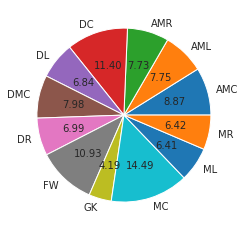

In [ ]:
sns.set_style("whitegrid")
pie_chart_pos = df_train.groupby('positionCode').size().plot(kind='pie', autopct='%.2f', ylabel = None)
pie_chart_pos.set(ylabel = None)

## Visualize data

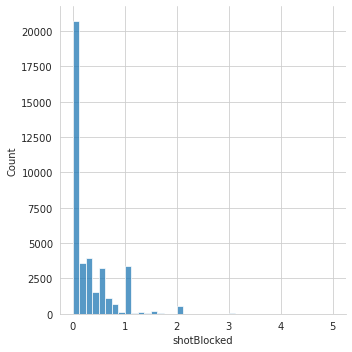

In [ ]:
sns.displot(x = df_train.shotBlocked, bins = 40)

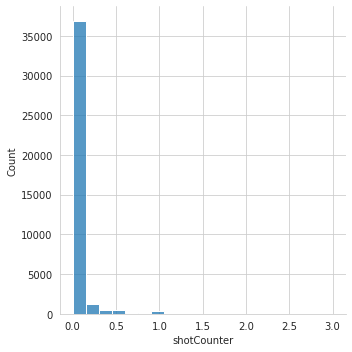

In [ ]:
sns.displot(x = df_train.shotCounter, bins = 20)

# Extract data for analysis

In [ ]:
analysis_data = df_train[['positionCode', 'positionGeneral']].copy()

In [ ]:
chosen_indicator = {
    'Clearances_Total': ['clearanceTotal'],
    'Shots_Feet': ['shotRightFoot', 'shotLeftFoot'],
    'Dribbles_Total':     ['dribbleTotal'],
    'Shots_Head':   ['shotHead'],
    'Interceptions_Total': ['interceptionAll'],
    'Shots_InTheBox': ['shotSixYardBox', 'shotPenaltyArea'],
    'Aerial_Challenges': ['duelAerialTotal'],
    'Passes_Short': ['shortPassAccurate','shortPassInaccurate'],
    'Shots_OutOfBox': ['shotOboxTotal'],
    'Blocks_Shots': ['outfielderBlock'],
    'Passes_Long': ['passLongBallAccurate', 'passLongBallInaccurate'],
    'Tackles_Total':    ['tackleTotalAttempted'],
    'Blocks_Passes':  ['outfielderBlockedPass'],
    'Passes_TotalCross': ['passCrossInaccurate','passCrossAccurate'],
    'Blocks_Crosses': ['passCrossBlockedDefensive'],
    'Saves_Total': ['saveTotal']
}

for indicator, attrs in chosen_indicator.items():
    analysis_data[indicator] = df_train[attrs].sum(axis = 1)
analysis_data

,positionCode,positionGeneral,Clearances_Total,Shots_Feet,Dribbles_Total,Shots_Head,Interceptions_Total,Shots_InTheBox,Aerial_Challenges,Passes_Short,Shots_OutOfBox,Blocks_Shots,Passes_Long,Tackles_Total,Blocks_Passes,Passes_TotalCross,Blocks_Crosses,Saves_Total
ID,,,,,,,,,,,,,,,,,,
111,FW,Striker,0.000000,2.000000,3.000000,0.000000,3.000000,2.0,3.000000,27.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.0
112,FW,Striker,0.000000,5.000000,2.000000,0.000000,1.000000,2.0,2.000000,31.000000,3.000000,0.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.0
113,FW,Striker,1.000000,3.000000,3.500000,0.000000,0.000000,1.5,0.000000,48.000000,1.500000,0.000000,3.000000,1.500000,0.000000,3.000000,0.000000,0.0
114,FW,Striker,0.000000,3.000000,1.000000,1.000000,1.000000,3.0,2.000000,43.000000,1.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.0
115,FW,Striker,1.114286,3.142857,2.857143,0.771429,0.314286,2.4,5.428571,22.914286,1.514286,0.314286,3.028571,1.142857,0.485714,1.085714,0.028571,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60152,GK,Goalkeeper,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,7.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.0
60153,GK,Goalkeeper,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,16.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.0
60154,GK,Goalkeeper,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,6.500000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,1.0


# Clustering analysis 

## For general positions

In [ ]:
cluster_data = analysis_data.drop(columns = ["positionCode", "positionGeneral"])
k_means = KMeans(n_clusters = 7)
clusters = k_means.fit_predict(cluster_data)

### Centeroids

In [ ]:
centroids  = k_means.cluster_centers_
pd.DataFrame(centroids, columns = cluster_data.columns)

,Clearances_Total,Shots_Feet,Dribbles_Total,Shots_Head,Interceptions_Total,Shots_InTheBox,Aerial_Challenges,Passes_Short,Shots_OutOfBox,Blocks_Shots,Passes_Long,Tackles_Total,Blocks_Passes,Passes_TotalCross,Blocks_Crosses,Saves_Total
0,1.313377,0.987298,1.617156,0.133619,0.984571,0.605950,2.700845,29.359281,0.517719,0.236067,3.915464,2.414531,0.730295,2.123812,0.164299,8.883448e-03
1,0.563919,0.984095,1.404893,0.182336,0.423282,0.792851,2.828740,12.138394,0.377750,0.085521,1.283674,1.474845,0.572554,1.263817,0.091616,3.325144e-02
2,1.642291,0.760808,1.282947,0.134948,1.262837,0.422935,2.613921,51.570784,0.475791,0.317915,5.601486,2.605197,0.683543,1.567660,0.137319,-4.538037e-15
3,1.577339,0.829034,1.373128,0.134142,1.170683,0.480668,2.673241,39.036313,0.484953,0.289512,4.942880,2.573217,0.700955,1.859322,0.149245,2.167852e-03
4,0.901479,0.005461,0.031383,0.005306,0.068790,0.007282,0.423708,10.114808,0.003485,0.012275,18.086634,0.106064,0.020276,0.032406,0.006432,2.862606e+00
5,0.891225,1.124172,1.766637,0.187198,0.677958,0.808297,3.113974,20.781756,0.506971,0.139343,2.409539,1.985125,0.698663,1.854269,0.129322,3.397353e-02
6,1.558640,0.723673,1.172982,0.152358,1.281638,0.400755,2.700618,71.638629,0.478455,0.308311,6.134656,2.429544,0.606525,1.390989,0.112996,1.124101e-15


### Statistics

In [ ]:
labels = analysis_data.positionGeneral.unique()
counting_table = {label: [0] * 7 for label in labels}

In [ ]:
for i in range(len(clusters)):
    pos = analysis_data.positionGeneral.iloc[i] 
    cluster = clusters[i]
    counting_table[pos][cluster] += 1

In [ ]:
pd.DataFrame.from_dict(counting_table)

,Striker,Wide Midfielder,Attacking Midfielder,Holding Midfielder,Full Back,Centre Back,Goalkeeper
0,457,2579,987,2537,1996,1089,34
1,1930,2926,680,555,308,114,93
2,35,321,181,1460,512,1047,0
3,138,989,487,2495,1386,1380,6
4,0,2,0,1,7,25,1382
5,1756,4324,1148,1419,1146,452,141
6,7,57,26,422,115,400,0


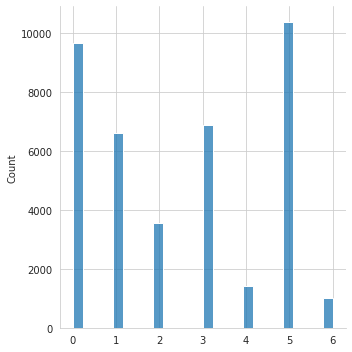

In [ ]:
sns.displot(clusters)

In [ ]:
cluster_df = pd.DataFrame([clusters, df_train.positionGeneral])

## For positionCode

In [ ]:
attrs = [
    'duelAerialLost',
    'duelAerialTotal',
    'duelAerialWon',
    'assistCross',
    'assistCorner',
    'assistThroughball',
    'assistFreekick',
    'assistThrowin',
    'assistOther',
    'assist',
    'passCrossBlockedDefensive',
    'outfielderBlockedPass',
    'outfielderBlock',
    'yellowCard',
    'redCard',
    'clearanceTotal',
    'dribbleLost',
    'dribbleTotal',
    'dribbleWon',
    'foulGiven',
    'foulCommitted',
    'goalRightFoot',
    'goalLeftFoot',
    'goalHead',
    'goalObp',
    'goalOpenPlay',
    'goalCounter',
    'goalSetPiece',
    'penaltyScored',
    'goalNormal',
    'goalTotal',
    'goalOwn',
    'goalSixYardBox',
    'goalPenaltyArea',
    'goalObox',
    'interceptionAll',
    'keyPassLong',
    'keyPassShort',
    'keyPassesTotal',
    'keyPassCross',
    'keyPassCorner',
    'keyPassThroughball',
    'keyPassFreekick',
    'keyPassThrowin',
    'keyPassOther',
    'offsideGiven',
    'passTotal',
    'passLongBallAccurate',
    'passLongBallInaccurate',
    'shortPassAccurate',
    'shortPassInaccurate',
    'passCornerAccurate',
    'passCornerInaccurate',
    'passFreekickAccurate',
    'passFreekickInaccurate',
    'passCrossInaccurate',
    'passCrossAccurate',
    'turnover',
    'dispossessed',
    'saveSixYardBox',
    'savePenaltyArea',
    'saveObox',
    'saveTotal',
    'shotOnTarget',
    'shotOffTarget',
    'shotOnPost',
    'shotBlocked',
    'shotRightFoot',
    'shotLeftFoot',
    'shotHead',
    'shotObp',
    'shotOpenPlay',
    'shotCounter',
    'shotSetPiece',
    'penaltyTaken',
    'shotSixYardBox',
    'shotPenaltyArea',
    'shotOboxTotal',
    'shotsTotal',
    'tackleWonTotal',
    'tackleTotalAttempted',
    'challengeLost'
]

In [ ]:
# cluster_data = analysis_data.drop(columns = ["positionCode", "positionGeneral"])

cluster_data_pc = df_train[attrs]
positionCodes = df_train.positionCode.unique()
n_clusters = len(positionCodes)

In [ ]:
n_clusters

12

In [ ]:
k_means = KMeans(n_clusters = n_clusters)
clusters_pc = k_means.fit_predict(cluster_data_pc)

In [ ]:
df_train[attrs]

,duelAerialLost,duelAerialTotal,duelAerialWon,assistCross,assistCorner,assistThroughball,assistFreekick,assistThrowin,assistOther,assist,...,shotCounter,shotSetPiece,penaltyTaken,shotSixYardBox,shotPenaltyArea,shotOboxTotal,shotsTotal,tackleWonTotal,tackleTotalAttempted,challengeLost
ID,,,,,,,,,,,,,,,,,,,,,
111,1.000000,3.000000,2.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000,3.000000,1.000000
112,1.000000,2.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,1.0,...,1.000000,1.000000,0.000000,0.000000,2.000000,3.000000,5.000000,0.000000,1.000000,1.000000
113,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.500000,0.5,...,0.000000,1.000000,0.000000,0.000000,1.500000,1.500000,3.000000,0.500000,1.500000,1.000000
114,2.000000,2.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,4.000000,5.000000,8.000000,3.000000
115,3.257143,5.428571,2.171429,0.028571,0.0,0.0,0.028571,0.0,0.342857,0.4,...,0.285714,1.114286,0.114286,0.428571,1.971429,1.514286,3.914286,0.628571,1.142857,0.514286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60152,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60153,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60154,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Centeroids

In [ ]:
centroids_pc  = k_means.cluster_centers_
df_centroids_pc = pd.DataFrame(centroids_pc, columns = cluster_data_pc.columns)
df_centroids_pc

,duelAerialLost,duelAerialTotal,duelAerialWon,assistCross,assistCorner,assistThroughball,assistFreekick,assistThrowin,assistOther,assist,...,shotCounter,shotSetPiece,penaltyTaken,shotSixYardBox,shotPenaltyArea,shotOboxTotal,shotsTotal,tackleWonTotal,tackleTotalAttempted,challengeLost
0,1.314414,2.665594,1.351180,0.026990,0.007658,0.006064,0.003739,2.064662e-04,0.044102,0.078187,...,2.323281e-02,0.274542,0.012308,0.051209,0.485431,0.499474,1.036114,1.569472,2.463212,0.893739
1,1.198047,2.667949,1.469902,0.019767,0.006436,0.006508,0.003150,4.046386e-05,0.041106,0.068619,...,1.140864e-02,0.289066,0.009411,0.047863,0.379844,0.450010,0.877717,1.674496,2.584862,0.910366
2,1.569146,2.458683,0.889537,0.018535,0.003519,0.004616,0.001709,1.300567e-04,0.045110,0.068882,...,5.979949e-02,0.242544,0.014419,0.087682,0.755583,0.470430,1.313695,0.994692,1.727696,0.733004
3,1.112494,2.762295,1.649802,0.003844,0.001062,0.005738,0.001991,-5.421011e-19,0.037657,0.048234,...,6.251197e-03,0.344785,0.011347,0.052680,0.318549,0.489719,0.860948,1.572125,2.401950,0.829825
4,1.226546,2.614390,1.387844,0.025176,0.007170,0.008201,0.004661,1.252965e-04,0.045838,0.080485,...,1.861402e-02,0.278764,0.010399,0.043559,0.428599,0.480672,0.952830,1.642196,2.566254,0.924059
5,1.365693,2.542089,1.176396,0.027309,0.008179,0.007514,0.003252,1.754494e-04,0.050538,0.086392,...,3.388928e-02,0.253445,0.013110,0.056880,0.568399,0.527894,1.153173,1.444578,2.341721,0.897144
6,0.071311,0.422354,0.351043,0.000187,0.000126,0.000140,0.000231,-3.252607e-19,0.002509,0.003066,...,-9.436896e-16,0.008754,0.000377,0.001125,0.004617,0.005608,0.011350,0.059429,0.113189,0.053761
7,1.166369,2.667264,1.500895,0.020469,0.006612,0.009567,0.002709,8.739607e-05,0.041930,0.072897,...,1.091325e-02,0.288894,0.010365,0.040558,0.342642,0.464890,0.848089,1.643563,2.581130,0.937567
8,1.183754,2.742382,1.558628,0.018469,0.004539,0.010908,0.003035,5.092946e-05,0.038576,0.068568,...,1.143070e-02,0.311535,0.011105,0.044928,0.351937,0.442998,0.839863,1.589937,2.425929,0.835991
9,1.318843,2.185857,0.867014,0.029448,0.007828,0.006552,0.004476,8.863408e-05,0.052195,0.089571,...,4.688344e-02,0.246297,0.014618,0.067418,0.674476,0.549386,1.291280,1.254355,2.109454,0.855099


In [ ]:
centroids_pc

array([[ 1.31441440e+00,  2.66559414e+00,  1.35117974e+00,
         2.69899938e-02,  7.65760949e-03,  6.06432864e-03,
         3.73945897e-03,  2.06466172e-04,  4.41021650e-02,
         7.81867935e-02,  1.69665468e-01,  7.15908893e-01,
         2.65308974e-01,  1.65536925e-01,  8.28072559e-03,
         1.46516238e+00,  5.92421086e-01,  1.48373652e+00,
         8.91315436e-01,  1.10727149e+00,  1.13361827e+00,
         4.75663783e-02,  2.79592523e-02,  1.41633649e-02,
         1.12118910e-04,  5.75807330e-02,  4.50290646e-03,
         1.81109780e-02,  9.60649689e-03,  8.01946175e-02,
         8.98011144e-02,  4.29432264e-03,  1.57995812e-02,
         5.61496985e-02,  1.78518347e-02,  1.06835624e+00,
         1.83325201e-01,  7.36300128e-01,  9.19625328e-01,
         2.86615602e-01,  1.08038200e-01,  2.20203793e-02,
         5.06322492e-02,  6.73250066e-03,  5.80085957e-01,
         9.28123905e-02,  3.63287102e+01,  2.06485681e+00,
         2.41646404e+00,  2.62573527e+01,  5.59003670e+0

In [ ]:
# top2_cluster = {posCode: df_centroids.nlargest(2, attr).index for posCode in positionCodes for attr in}
topk_best_cluster = {attr: [] for attr in attrs}

for attr in attrs:
    topk_best_cluster[attr] = df_centroids_pc.nlargest(3, attr).index
topk_best_cluster

{'duelAerialLost': Int64Index([11, 10, 2], dtype='int64'),
 'duelAerialTotal': Int64Index([11, 3, 8], dtype='int64'),
 'duelAerialWon': Int64Index([11, 3, 8], dtype='int64'),
 'assistCross': Int64Index([9, 5, 0], dtype='int64'),
 'assistCorner': Int64Index([5, 9, 0], dtype='int64'),
 'assistThroughball': Int64Index([8, 7, 4], dtype='int64'),
 'assistFreekick': Int64Index([4, 9, 0], dtype='int64'),
 'assistThrowin': Int64Index([11, 0, 5], dtype='int64'),
 'assistOther': Int64Index([11, 9, 5], dtype='int64'),
 'assist': Int64Index([9, 5, 4], dtype='int64'),
 'passCrossBlockedDefensive': Int64Index([0, 5, 4], dtype='int64'),
 'outfielderBlockedPass': Int64Index([5, 9, 0], dtype='int64'),
 'outfielderBlock': Int64Index([8, 7, 1], dtype='int64'),
 'yellowCard': Int64Index([8, 1, 7], dtype='int64'),
 'redCard': Int64Index([10, 1, 4], dtype='int64'),
 'clearanceTotal': Int64Index([7, 1, 8], dtype='int64'),
 'dribbleLost': Int64Index([9, 2, 5], dtype='int64'),
 'dribbleTotal': Int64Index([9, 2

In [ ]:
# top2_cluster = {posCode: df_centroids.nlargest(2, attr).index for posCode in positionCodes for attr in}
topk_worst_cluster = {attr: [] for attr in attrs}
for attr in attrs:
    topk_worst_cluster[attr] = df_centroids_pc.nsmallest(3, attr).index
topk_worst_cluster

{'duelAerialLost': Int64Index([6, 3, 7], dtype='int64'),
 'duelAerialTotal': Int64Index([6, 9, 2], dtype='int64'),
 'duelAerialWon': Int64Index([6, 10, 9], dtype='int64'),
 'assistCross': Int64Index([6, 3, 10], dtype='int64'),
 'assistCorner': Int64Index([6, 3, 11], dtype='int64'),
 'assistThroughball': Int64Index([6, 10, 11], dtype='int64'),
 'assistFreekick': Int64Index([6, 11, 10], dtype='int64'),
 'assistThrowin': Int64Index([10, 3, 6], dtype='int64'),
 'assistOther': Int64Index([6, 10, 3], dtype='int64'),
 'assist': Int64Index([6, 10, 3], dtype='int64'),
 'passCrossBlockedDefensive': Int64Index([6, 10, 11], dtype='int64'),
 'outfielderBlockedPass': Int64Index([6, 10, 3], dtype='int64'),
 'outfielderBlock': Int64Index([6, 10, 2], dtype='int64'),
 'yellowCard': Int64Index([6, 10, 2], dtype='int64'),
 'redCard': Int64Index([6, 3, 11], dtype='int64'),
 'clearanceTotal': Int64Index([10, 2, 9], dtype='int64'),
 'dribbleLost': Int64Index([6, 3, 8], dtype='int64'),
 'dribbleTotal': Int64I

In [ ]:
worst_cluster = dict(pd.DataFrame(centroids_pc, columns = cluster_data_pc.columns).idxmin())

### Statistics

In [ ]:
labels_pc = df_train.positionCode.unique()
counting_table_pc = {label: [0] * 12 for label in labels_pc}


for i in range(len(clusters_pc)):
    pos = df_train.positionCode.iloc[i] 
    cluster = clusters_pc[i]
    counting_table_pc[pos][cluster] += 1
df_counting_table = pd.DataFrame.from_dict(counting_table_pc)
df_counting_table

,FW,AML,AMC,AMR,ML,MC,MR,DMC,DL,DC,DR,GK
0,156,267,493,275,275,1026,269,539,631,748,621,65
1,34,78,179,74,62,704,72,584,265,915,266,4
2,1231,742,582,758,576,377,589,105,127,67,154,66
3,0,3,7,0,6,52,5,81,16,134,7,0
4,93,156,286,146,158,957,159,620,488,859,454,14
5,324,519,671,507,478,1057,442,372,581,401,620,79
6,0,0,0,0,0,0,3,1,6,22,2,1328
7,18,26,81,36,40,433,40,392,138,675,135,3
8,5,12,23,11,13,173,9,180,53,405,49,0
9,636,817,727,732,614,718,596,200,334,142,361,64


### Analyse

In [ ]:
threshold = 100
kmeans_chosen_features_of_position = {posCode: set() for posCode in positionCodes}
# for posCode in positionCodes:
for attr in attrs:
    for posCode in positionCodes:
        # Adding best attributes for each position
        for index in topk_best_cluster[attr]:
            if df_counting_table.iloc[index][posCode] > threshold:
                kmeans_chosen_features_of_position[posCode].add(attr)

        # Remove worst attributes for each position
        for index in topk_best_cluster[attr]:
            if df_counting_table.iloc[index][posCode] > threshold and attr in [posCode]:
                [posCode].remove(attr)
kmeans_chosen_features_of_position
        


{'FW': {'assist',
  'assistCorner',
  'assistCross',
  'assistFreekick',
  'assistOther',
  'assistThrowin',
  'dispossessed',
  'dribbleLost',
  'dribbleTotal',
  'dribbleWon',
  'duelAerialLost',
  'duelAerialTotal',
  'duelAerialWon',
  'foulCommitted',
  'foulGiven',
  'goalCounter',
  'goalHead',
  'goalLeftFoot',
  'goalNormal',
  'goalObox',
  'goalObp',
  'goalOpenPlay',
  'goalOwn',
  'goalPenaltyArea',
  'goalRightFoot',
  'goalSetPiece',
  'goalSixYardBox',
  'goalTotal',
  'keyPassCorner',
  'keyPassCross',
  'keyPassFreekick',
  'keyPassLong',
  'keyPassOther',
  'keyPassShort',
  'keyPassThrowin',
  'keyPassesTotal',
  'offsideGiven',
  'outfielderBlockedPass',
  'passCornerAccurate',
  'passCornerInaccurate',
  'passCrossAccurate',
  'passCrossBlockedDefensive',
  'passCrossInaccurate',
  'penaltyScored',
  'penaltyTaken',
  'redCard',
  'saveObox',
  'savePenaltyArea',
  'saveSixYardBox',
  'saveTotal',
  'shortPassInaccurate',
  'shotBlocked',
  'shotCounter',
  'shotH

In [ ]:
positionCodes = df_train.positionCode.unique()
train_data = {}
test_data = {}
for posCode in positionCodes:
    train_data[posCode] = df_train.loc[df_train.positionCode == posCode]
    test_data[posCode] = df_test.loc[df_test.positionCode == posCode]

# Quantitle analysis

In [ ]:
q_50 = dict(df_train.quantile(0.50))
q_75 = dict(df_train.quantile(0.75))
q_90 = dict(df_train.quantile(0.90))

In [ ]:
positionCodes = df_train.positionCode.unique()

# attrs = chosen_indicator.keys()
count_q_50_75 = {attr: [] for attr in attrs}
count_q_75_90 = {attr: [] for attr in attrs}
count_q_90_100 = {attr: [] for attr in attrs}

count_positions = {
    
} # Count how many players in each position
for posCode in positionCodes:
    count_positions[posCode] = len(df_train.loc[df_train.positionCode == posCode])

for attr in attrs:
    for posCode in positionCodes:
        count_50_75 = len(df_train[attr].loc[(df_train.positionCode == posCode) & (df_train[attr]> q_50[attr]) & (df_train[attr] <= q_75[attr])])
        count_q_50_75[attr].append(count_50_75/count_positions[posCode])
        
        count_75_90 = len(df_train[attr].loc[(df_train.positionCode == posCode) & (df_train[attr]> q_75[attr]) & (df_train[attr] <= q_90[attr])])
        count_q_75_90[attr].append(count_75_90/count_positions[posCode])
        
        
        count_90_100 = len(df_train[attr].loc[(df_train.positionCode == posCode) & (df_train[attr]> q_90[attr]) & (df_train[attr] <= df_train[attr].max())])                              
        count_q_90_100[attr].append(count_90_100/count_positions[posCode])
        


In [ ]:
def show_df(count_dict_quantile):
    df = pd.DataFrame.from_dict(count_dict_quantile)
    df.index = positionCodes
    df.columns.name = attr
    display(df)
    return df

In [ ]:
df_q_50_75 = show_df(count_q_50_75)
df_q_75_90 = show_df(count_q_75_90)
df_q_90_100 = show_df(count_q_90_100)

challengeLost,duelAerialLost,duelAerialTotal,duelAerialWon,assistCross,assistCorner,assistThroughball,assistFreekick,assistThrowin,assistOther,assist,...,shotCounter,shotSetPiece,penaltyTaken,shotSixYardBox,shotPenaltyArea,shotOboxTotal,shotsTotal,tackleWonTotal,tackleTotalAttempted,challengeLost
FW,0.209577,0.195235,0.150590,0.0,0.0,0.0,0.0,0.0,0.0,0.026602,...,0.0,0.291696,0.0,0.0,0.320379,0.350914,0.181124,0.118668,0.077955,0.204256
AML,0.278721,0.207572,0.087141,0.0,0.0,0.0,0.0,0.0,0.0,0.001958,...,0.0,0.204634,0.0,0.0,0.427219,0.242820,0.157637,0.282311,0.210183,0.280679
AMC,0.277857,0.208606,0.082645,0.0,0.0,0.0,0.0,0.0,0.0,0.001425,...,0.0,0.180678,0.0,0.0,0.436307,0.212881,0.151325,0.263323,0.207467,0.279282
AMR,0.261040,0.203467,0.089630,0.0,0.0,0.0,0.0,0.0,0.0,0.000981,...,0.0,0.193327,0.0,0.0,0.430487,0.242722,0.153418,0.293425,0.218515,0.284266
ML,0.251084,0.214426,0.090658,0.0,0.0,0.0,0.0,0.0,0.0,0.000788,...,0.0,0.157272,0.0,0.0,0.404415,0.225069,0.133228,0.284588,0.222310,0.271975
MC,0.314495,0.287110,0.193790,0.0,0.0,0.0,0.0,0.0,0.0,0.023548,...,0.0,0.345194,0.0,0.0,0.339264,0.337345,0.176871,0.411129,0.284842,0.273155
MR,0.266535,0.225984,0.093307,0.0,0.0,0.0,0.0,0.0,0.0,0.001181,...,0.0,0.150787,0.0,0.0,0.392126,0.199213,0.126378,0.291732,0.220866,0.273622
DMC,0.294043,0.275349,0.183460,0.0,0.0,0.0,0.0,0.0,0.0,0.014892,...,0.0,0.275032,0.0,0.0,0.233207,0.300063,0.126426,0.378961,0.281686,0.271546
DL,0.348983,0.346026,0.262477,0.0,0.0,0.0,0.0,0.0,0.0,0.029575,...,0.0,0.325693,0.0,0.0,0.226248,0.272458,0.075416,0.431793,0.316451,0.296118
DC,0.478145,0.309519,0.194808,0.0,0.0,0.0,0.0,0.0,0.0,0.081651,...,0.0,0.376082,0.0,0.0,0.331928,0.066119,0.031728,0.479033,0.228755,0.161970


challengeLost,duelAerialLost,duelAerialTotal,duelAerialWon,assistCross,assistCorner,assistThroughball,assistFreekick,assistThrowin,assistOther,assist,...,shotCounter,shotSetPiece,penaltyTaken,shotSixYardBox,shotPenaltyArea,shotOboxTotal,shotsTotal,tackleWonTotal,tackleTotalAttempted,challengeLost
FW,0.194772,0.205413,0.182512,0.001388,0.0,0.0,0.0,0.0,0.164469,0.255378,...,0.061531,0.214434,0.0,0.176266,0.218136,0.148971,0.319917,0.005320,0.025677,0.087439
AML,0.099869,0.103460,0.113577,0.000653,0.0,0.0,0.0,0.0,0.058420,0.138381,...,0.017624,0.127937,0.0,0.099543,0.108355,0.229112,0.253916,0.034269,0.084856,0.187010
AMC,0.110858,0.117412,0.110573,0.000285,0.0,0.0,0.0,0.0,0.053007,0.133656,...,0.018239,0.146765,0.0,0.066971,0.086634,0.239384,0.255343,0.036193,0.097464,0.197207
AMR,0.123978,0.115146,0.112856,0.000000,0.0,0.0,0.0,0.0,0.056919,0.140334,...,0.019954,0.130847,0.0,0.096827,0.097808,0.214917,0.238469,0.035656,0.096173,0.196271
ML,0.102877,0.115097,0.135199,0.000000,0.0,0.0,0.0,0.0,0.032716,0.098542,...,0.009460,0.123374,0.0,0.059125,0.059913,0.202601,0.191959,0.048482,0.104848,0.205361
MC,0.081458,0.109890,0.135182,0.001395,0.0,0.0,0.0,0.0,0.135531,0.214373,...,0.039072,0.143380,0.0,0.126635,0.030002,0.174952,0.131170,0.138496,0.214722,0.344322
MR,0.110630,0.114173,0.128346,0.000000,0.0,0.0,0.0,0.0,0.034646,0.104724,...,0.010236,0.105512,0.0,0.056299,0.057480,0.202362,0.183465,0.046063,0.114173,0.210236
DMC,0.079214,0.131179,0.183460,0.000000,0.0,0.0,0.0,0.0,0.074144,0.134981,...,0.013942,0.132129,0.0,0.087769,0.012674,0.171736,0.098226,0.137516,0.231622,0.336185
DL,0.082440,0.139741,0.181146,0.004436,0.0,0.0,0.0,0.0,0.134566,0.253604,...,0.029575,0.094270,0.0,0.102033,0.008872,0.089094,0.040665,0.144917,0.184473,0.187431
DC,0.203461,0.356113,0.372088,0.002884,0.0,0.0,0.0,0.0,0.145108,0.106057,...,0.005769,0.277346,0.0,0.349235,0.007322,0.018194,0.010206,0.061016,0.055247,0.054804


challengeLost,duelAerialLost,duelAerialTotal,duelAerialWon,assistCross,assistCorner,assistThroughball,assistFreekick,assistThrowin,assistOther,assist,...,shotCounter,shotSetPiece,penaltyTaken,shotSixYardBox,shotPenaltyArea,shotOboxTotal,shotsTotal,tackleWonTotal,tackleTotalAttempted,challengeLost
FW,0.376822,0.320379,0.182743,0.072635,0.013185,0.055517,0.009253,0.000000,0.158686,0.090215,...,0.296785,0.119362,0.198936,0.315522,0.287532,0.090678,0.219986,0.015267,0.011335,0.019431
AML,0.080614,0.069517,0.036554,0.111619,0.032637,0.028721,0.015339,0.000326,0.141971,0.133812,...,0.179830,0.125979,0.058094,0.134791,0.164164,0.156005,0.173956,0.067559,0.050587,0.043407
AMC,0.097464,0.078085,0.040467,0.106583,0.045027,0.053861,0.025363,0.000000,0.153320,0.147905,...,0.135651,0.158735,0.068966,0.110288,0.135081,0.200342,0.171559,0.073525,0.060131,0.060131
AMR,0.095846,0.082761,0.042525,0.120379,0.035002,0.029768,0.018646,0.000000,0.146549,0.140988,...,0.150147,0.124632,0.053647,0.127903,0.148839,0.140334,0.156690,0.072947,0.061171,0.056264
ML,0.061096,0.058337,0.036657,0.089082,0.028380,0.018920,0.014978,0.000394,0.115885,0.120221,...,0.105242,0.121009,0.035475,0.090658,0.113914,0.136776,0.129287,0.106425,0.088293,0.062672
MC,0.032095,0.036979,0.038549,0.114600,0.052329,0.056166,0.034537,0.000349,0.099424,0.080935,...,0.062794,0.081633,0.051282,0.049363,0.034362,0.136578,0.052677,0.133612,0.141985,0.077621
MR,0.074803,0.065748,0.039370,0.111417,0.028346,0.022835,0.014567,0.001181,0.109843,0.127953,...,0.112992,0.118504,0.028740,0.091339,0.095276,0.118504,0.111024,0.114961,0.099606,0.079528
DMC,0.031052,0.051965,0.060520,0.056717,0.023447,0.038023,0.013308,0.000000,0.070342,0.054816,...,0.022180,0.090304,0.026933,0.040241,0.015843,0.109949,0.029785,0.205323,0.178707,0.089037
DL,0.022551,0.043623,0.055823,0.213678,0.042144,0.019593,0.035490,0.004067,0.060998,0.055083,...,0.021072,0.055083,0.018484,0.029205,0.013678,0.031793,0.012569,0.150462,0.088725,0.026617
DC,0.059241,0.194586,0.278678,0.021744,0.002441,0.018860,0.003106,0.001331,0.020856,0.009097,...,0.003106,0.095851,0.009319,0.067673,0.005325,0.004659,0.003550,0.051697,0.022853,0.005547


In [ ]:
def get_quantile_dict(attr):
    df_dict = {
        "50-75%": df_q_50_75[attr],
        "75-90%": df_q_75_90[attr],
        "90-100%": df_q_90_100[attr]
    }
    return df_dict

duelAerialLost,50-75%,75-90%,90-100%
FW,0.209577,0.194772,0.376822
AML,0.278721,0.099869,0.080614
AMC,0.277857,0.110858,0.097464
AMR,0.261040,0.123978,0.095846
ML,0.251084,0.102877,0.061096
MC,0.314495,0.081458,0.032095
MR,0.266535,0.110630,0.074803
DMC,0.294043,0.079214,0.031052
DL,0.348983,0.082440,0.022551
DC,0.478145,0.203461,0.059241


duelAerialTotal,50-75%,75-90%,90-100%
FW,0.195235,0.205413,0.320379
AML,0.207572,0.103460,0.069517
AMC,0.208606,0.117412,0.078085
AMR,0.203467,0.115146,0.082761
ML,0.214426,0.115097,0.058337
MC,0.287110,0.109890,0.036979
MR,0.225984,0.114173,0.065748
DMC,0.275349,0.131179,0.051965
DL,0.346026,0.139741,0.043623
DC,0.309519,0.356113,0.194586


duelAerialWon,50-75%,75-90%,90-100%
FW,0.150590,0.182512,0.182743
AML,0.087141,0.113577,0.036554
AMC,0.082645,0.110573,0.040467
AMR,0.089630,0.112856,0.042525
ML,0.090658,0.135199,0.036657
MC,0.193790,0.135182,0.038549
MR,0.093307,0.128346,0.039370
DMC,0.183460,0.183460,0.060520
DL,0.262477,0.181146,0.055823
DC,0.194808,0.372088,0.278678


assistCross,50-75%,75-90%,90-100%
FW,0.0,0.001388,0.072635
AML,0.0,0.000653,0.111619
AMC,0.0,0.000285,0.106583
AMR,0.0,0.000000,0.120379
ML,0.0,0.000000,0.089082
MC,0.0,0.001395,0.114600
MR,0.0,0.000000,0.111417
DMC,0.0,0.000000,0.056717
DL,0.0,0.004436,0.213678
DC,0.0,0.002884,0.021744


assistCorner,50-75%,75-90%,90-100%
FW,0.0,0.0,0.013185
AML,0.0,0.0,0.032637
AMC,0.0,0.0,0.045027
AMR,0.0,0.0,0.035002
ML,0.0,0.0,0.028380
MC,0.0,0.0,0.052329
MR,0.0,0.0,0.028346
DMC,0.0,0.0,0.023447
DL,0.0,0.0,0.042144
DC,0.0,0.0,0.002441


assistThroughball,50-75%,75-90%,90-100%
FW,0.0,0.0,0.055517
AML,0.0,0.0,0.028721
AMC,0.0,0.0,0.053861
AMR,0.0,0.0,0.029768
ML,0.0,0.0,0.018920
MC,0.0,0.0,0.056166
MR,0.0,0.0,0.022835
DMC,0.0,0.0,0.038023
DL,0.0,0.0,0.019593
DC,0.0,0.0,0.018860


assistFreekick,50-75%,75-90%,90-100%
FW,0.0,0.0,0.009253
AML,0.0,0.0,0.015339
AMC,0.0,0.0,0.025363
AMR,0.0,0.0,0.018646
ML,0.0,0.0,0.014978
MC,0.0,0.0,0.034537
MR,0.0,0.0,0.014567
DMC,0.0,0.0,0.013308
DL,0.0,0.0,0.035490
DC,0.0,0.0,0.003106


assistThrowin,50-75%,75-90%,90-100%
FW,0.0,0.0,0.000000
AML,0.0,0.0,0.000326
AMC,0.0,0.0,0.000000
AMR,0.0,0.0,0.000000
ML,0.0,0.0,0.000394
MC,0.0,0.0,0.000349
MR,0.0,0.0,0.001181
DMC,0.0,0.0,0.000000
DL,0.0,0.0,0.004067
DC,0.0,0.0,0.001331


assistOther,50-75%,75-90%,90-100%
FW,0.0,0.164469,0.158686
AML,0.0,0.058420,0.141971
AMC,0.0,0.053007,0.153320
AMR,0.0,0.056919,0.146549
ML,0.0,0.032716,0.115885
MC,0.0,0.135531,0.099424
MR,0.0,0.034646,0.109843
DMC,0.0,0.074144,0.070342
DL,0.0,0.134566,0.060998
DC,0.0,0.145108,0.020856


assist,50-75%,75-90%,90-100%
FW,0.026602,0.255378,0.090215
AML,0.001958,0.138381,0.133812
AMC,0.001425,0.133656,0.147905
AMR,0.000981,0.140334,0.140988
ML,0.000788,0.098542,0.120221
MC,0.023548,0.214373,0.080935
MR,0.001181,0.104724,0.127953
DMC,0.014892,0.134981,0.054816
DL,0.029575,0.253604,0.055083
DC,0.081651,0.106057,0.009097


passCrossBlockedDefensive,50-75%,75-90%,90-100%
FW,0.099237,0.030766,0.014342
AML,0.074086,0.106070,0.098564
AMC,0.052722,0.055856,0.049872
AMR,0.064769,0.116454,0.087995
ML,0.036263,0.129681,0.152937
MC,0.174080,0.155765,0.046921
MR,0.036220,0.124803,0.128740
DMC,0.129911,0.128644,0.067490
DL,0.053604,0.302403,0.327911
DC,0.283781,0.274018,0.067229


outfielderBlockedPass,50-75%,75-90%,90-100%
FW,0.289614,0.040944,0.043951
AML,0.351501,0.086488,0.110640
AMC,0.328014,0.066971,0.096039
AMR,0.359176,0.075564,0.118090
ML,0.334253,0.096571,0.138352
MC,0.417931,0.127856,0.091750
MR,0.346850,0.072441,0.141732
DMC,0.384981,0.107098,0.087136
DL,0.435490,0.110166,0.077264
DC,0.249390,0.020191,0.016641


outfielderBlock,50-75%,75-90%,90-100%
FW,0.251908,0.043951,0.014805
AML,0.099543,0.045692,0.027089
AMC,0.108863,0.055001,0.035338
AMR,0.111547,0.045469,0.029441
ML,0.088293,0.071344,0.041782
MC,0.277516,0.201640,0.061399
MR,0.086220,0.067323,0.053543
DMC,0.197085,0.246198,0.106781
DL,0.297597,0.241035,0.070980
DC,0.063457,0.375194,0.434879


yellowCard,50-75%,75-90%,90-100%
FW,0.261393,0.133241,0.034235
AML,0.125653,0.127937,0.057115
AMC,0.121687,0.142776,0.063836
AMR,0.122996,0.122996,0.058227
ML,0.087899,0.130075,0.073709
MC,0.241409,0.268446,0.063841
MR,0.088189,0.135039,0.068898
DMC,0.170469,0.289290,0.092522
DL,0.295009,0.219224,0.061368
DC,0.383847,0.269581,0.044375


redCard,50-75%,75-90%,90-100%
FW,0.0,0.0,0.037243
AML,0.0,0.0,0.024151
AMC,0.0,0.0,0.022514
AMR,0.0,0.0,0.021590
ML,0.0,0.0,0.022467
MC,0.0,0.0,0.066806
MR,0.0,0.0,0.009055
DMC,0.0,0.0,0.055767
DL,0.0,0.0,0.073198
DC,0.0,0.0,0.138008


clearanceTotal,50-75%,75-90%,90-100%
FW,0.215822,0.040019,0.003007
AML,0.172324,0.043407,0.004569
AMC,0.168994,0.047592,0.005130
AMR,0.174027,0.049068,0.005234
ML,0.232558,0.097753,0.017737
MC,0.355311,0.122623,0.008721
MR,0.246063,0.108661,0.016535
DMC,0.385615,0.193283,0.030101
DL,0.339741,0.441035,0.075786
DC,0.053472,0.275349,0.650987


dribbleLost,50-75%,75-90%,90-100%
FW,0.432339,0.113347,0.101550
AML,0.364230,0.151436,0.228133
AMC,0.403249,0.096039,0.133656
AMR,0.356232,0.144913,0.215898
ML,0.365786,0.112337,0.201419
MC,0.345892,0.049538,0.053724
MR,0.362205,0.105118,0.200394
DMC,0.287072,0.015843,0.019962
DL,0.429945,0.075046,0.052865
DC,0.052363,0.001109,0.002884


dribbleTotal,50-75%,75-90%,90-100%
FW,0.297710,0.163544,0.091834
AML,0.243146,0.220953,0.241188
AMC,0.266173,0.191793,0.151040
AMR,0.260386,0.228328,0.200851
ML,0.245960,0.201025,0.193142
MC,0.270016,0.119658,0.065411
MR,0.245276,0.198031,0.176378
DMC,0.234791,0.076679,0.027883
DL,0.324214,0.121257,0.045841
DC,0.041713,0.007544,0.002663


dribbleWon,50-75%,75-90%,90-100%
FW,0.296322,0.169558,0.070784
AML,0.252937,0.253916,0.176567
AMC,0.279282,0.232830,0.124252
AMR,0.264311,0.254825,0.160288
ML,0.258573,0.222310,0.150966
MC,0.283796,0.178964,0.067504
MR,0.282677,0.216929,0.129134
DMC,0.288973,0.137199,0.042776
DL,0.316451,0.163401,0.037338
DC,0.091635,0.017306,0.004659


foulGiven,50-75%,75-90%,90-100%
FW,0.189220,0.194772,0.132316
AML,0.116514,0.201044,0.156658
AMC,0.120547,0.191508,0.172699
AMR,0.114164,0.195289,0.141969
ML,0.117856,0.178163,0.143477
MC,0.177220,0.164312,0.096982
MR,0.096063,0.192126,0.137795
DMC,0.159379,0.159696,0.077947
DL,0.166728,0.112384,0.042884
DC,0.090082,0.046816,0.012203


foulCommitted,50-75%,75-90%,90-100%
FW,0.194541,0.188526,0.127226
AML,0.118799,0.147193,0.091384
AMC,0.126247,0.159590,0.098319
AMR,0.123651,0.140988,0.091593
ML,0.117856,0.141506,0.083957
MC,0.212803,0.204430,0.123496
MR,0.109449,0.154724,0.092126
DMC,0.189480,0.237326,0.159062
DL,0.208872,0.146396,0.051756
DC,0.234080,0.092079,0.029732


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


goalRightFoot,50-75%,75-90%,90-100%
FW,0.0,0.168633,0.273884
AML,0.0,0.077676,0.174282
AMC,0.0,0.072670,0.147050
AMR,0.0,0.085705,0.137390
ML,0.0,0.047694,0.123374
MC,0.0,0.138496,0.075528
MR,0.0,0.041732,0.089764
DMC,0.0,0.086185,0.053232
DL,0.0,0.049168,0.015157
DC,0.0,0.095851,0.009984


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


goalLeftFoot,50-75%,75-90%,90-100%
FW,0.0,0.054592,0.249827
AML,0.0,0.011423,0.129569
AMC,0.0,0.011684,0.127672
AMR,0.0,0.012758,0.161596
ML,0.0,0.007095,0.100512
MC,0.0,0.030874,0.080586
MR,0.0,0.006693,0.094094
DMC,0.0,0.017110,0.044043
DL,0.0,0.057301,0.085028
DC,0.0,0.041935,0.022188


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


goalHead,50-75%,75-90%,90-100%
FW,0.0,0.0,0.242887
AML,0.0,0.0,0.059399
AMC,0.0,0.0,0.052437
AMR,0.0,0.0,0.052666
ML,0.0,0.0,0.033898
MC,0.0,0.0,0.057038
MR,0.0,0.0,0.031890
DMC,0.0,0.0,0.044043
DL,0.0,0.0,0.036599
DC,0.0,0.0,0.218993


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


goalObp,50-75%,75-90%,90-100%
FW,0.0,0.0,0.012029
AML,0.0,0.0,0.004243
AMC,0.0,0.0,0.001710
AMR,0.0,0.0,0.002617
ML,0.0,0.0,0.000788
MC,0.0,0.0,0.001570
MR,0.0,0.0,0.003150
DMC,0.0,0.0,0.000634
DL,0.0,0.0,0.001479
DC,0.0,0.0,0.005325


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


goalOpenPlay,50-75%,75-90%,90-100%
FW,0.0,0.266482,0.234097
AML,0.0,0.135770,0.152742
AMC,0.0,0.133371,0.139926
AMR,0.0,0.149166,0.141315
ML,0.0,0.096965,0.116279
MC,0.0,0.190999,0.049014
MR,0.0,0.091732,0.087795
DMC,0.0,0.099176,0.032953
DL,0.0,0.134196,0.016266
DC,0.0,0.038828,0.001331


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


goalCounter,50-75%,75-90%,90-100%
FW,0.0,0.0,0.118668
AML,0.0,0.0,0.049935
AMC,0.0,0.0,0.030493
AMR,0.0,0.0,0.046778
ML,0.0,0.0,0.028774
MC,0.0,0.0,0.021280
MR,0.0,0.0,0.025984
DMC,0.0,0.0,0.010139
DL,0.0,0.0,0.005545
DC,0.0,0.0,0.001109


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


goalSetPiece,50-75%,75-90%,90-100%
FW,0.0,0.017580,0.204950
AML,0.0,0.001632,0.072128
AMC,0.0,0.001140,0.068681
AMR,0.0,0.001963,0.074910
ML,0.0,0.000000,0.046117
MC,0.0,0.010466,0.083551
MR,0.0,0.001181,0.040157
DMC,0.0,0.004753,0.073511
DL,0.0,0.014787,0.060998
DC,0.0,0.051697,0.245396


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


penaltyScored,50-75%,75-90%,90-100%
FW,0.0,0.0,0.162619
AML,0.0,0.0,0.046018
AMC,0.0,0.0,0.057851
AMR,0.0,0.0,0.042852
ML,0.0,0.0,0.028380
MC,0.0,0.0,0.042909
MR,0.0,0.0,0.024409
DMC,0.0,0.0,0.023447
DL,0.0,0.0,0.015157
DC,0.0,0.0,0.008653


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


goalNormal,50-75%,75-90%,90-100%
FW,0.006477,0.315522,0.226000
AML,0.007180,0.180483,0.144256
AMC,0.006840,0.177828,0.127672
AMR,0.004253,0.191364,0.140661
ML,0.006307,0.136382,0.113126
MC,0.054247,0.195360,0.045177
MR,0.007087,0.123228,0.084252
DMC,0.035805,0.127060,0.031052
DL,0.076155,0.113863,0.014418
DC,0.152208,0.151986,0.009097


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


goalTotal,50-75%,75-90%,90-100%
FW,0.010641,0.285681,0.269026
AML,0.012076,0.174935,0.160574
AMC,0.012539,0.171274,0.147335
AMR,0.010795,0.189074,0.154400
ML,0.010248,0.132834,0.124557
MC,0.069771,0.188034,0.053026
MR,0.011024,0.118898,0.096457
DMC,0.048162,0.122940,0.035805
DL,0.093530,0.103512,0.015527
DC,0.182827,0.124029,0.010428


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


goalOwn,50-75%,75-90%,90-100%
FW,0.0,0.0,0.008096
AML,0.0,0.0,0.000979
AMC,0.0,0.0,0.000570
AMR,0.0,0.0,0.002617
ML,0.0,0.0,0.001577
MC,0.0,0.0,0.009594
MR,0.0,0.0,0.003937
DMC,0.0,0.0,0.011407
DL,0.0,0.0,0.032532
DC,0.0,0.0,0.107167


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


goalSixYardBox,50-75%,75-90%,90-100%
FW,0.0,0.0,0.299792
AML,0.0,0.0,0.097585
AMC,0.0,0.0,0.072100
AMR,0.0,0.0,0.094210
ML,0.0,0.0,0.056760
MC,0.0,0.0,0.063492
MR,0.0,0.0,0.057480
DMC,0.0,0.0,0.040558
DL,0.0,0.0,0.043623
DC,0.0,0.0,0.160639


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


goalPenaltyArea,50-75%,75-90%,90-100%
FW,0.0,0.210502,0.287532
AML,0.0,0.111292,0.165470
AMC,0.0,0.108578,0.148475
AMR,0.0,0.115146,0.157344
ML,0.0,0.072527,0.128498
MC,0.0,0.165533,0.055817
MR,0.0,0.069291,0.094094
DMC,0.0,0.096008,0.036122
DL,0.0,0.125323,0.021442
DC,0.0,0.198580,0.012869


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


goalObox,50-75%,75-90%,90-100%
FW,0.0,0.0,0.139718
AML,0.0,0.0,0.091384
AMC,0.0,0.0,0.095754
AMR,0.0,0.0,0.097154
ML,0.0,0.0,0.057942
MC,0.0,0.0,0.119309
MR,0.0,0.0,0.051969
DMC,0.0,0.0,0.073511
DL,0.0,0.0,0.065065
DC,0.0,0.0,0.019081


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


interceptionAll,50-75%,75-90%,90-100%
FW,0.079574,0.018968,0.003470
AML,0.228786,0.076697,0.017298
AMC,0.204332,0.060986,0.015959
AMR,0.232581,0.073602,0.011122
ML,0.282223,0.126133,0.027986
MC,0.318507,0.233037,0.070992
MR,0.280709,0.120472,0.037008
DMC,0.320025,0.314322,0.128644
DL,0.328281,0.331978,0.115712
DC,0.297759,0.416685,0.162858


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


keyPassLong,50-75%,75-90%,90-100%
FW,0.124913,0.087208,0.043257
AML,0.044713,0.160248,0.102480
AMC,0.034483,0.163009,0.145341
AMR,0.044815,0.156035,0.110893
ML,0.029168,0.158849,0.119432
MC,0.118437,0.210535,0.103960
MR,0.029134,0.157480,0.125591
DMC,0.105830,0.158112,0.080165
DL,0.138632,0.268762,0.095009
DC,0.254271,0.085866,0.012869


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


keyPassShort,50-75%,75-90%,90-100%
FW,0.405737,0.129308,0.102244
AML,0.322454,0.127611,0.180809
AMC,0.315474,0.134511,0.202337
AMR,0.327772,0.121034,0.174681
ML,0.340166,0.092629,0.143082
MC,0.340834,0.100471,0.083900
MR,0.323622,0.096457,0.149213
DMC,0.299747,0.059252,0.061153
DL,0.374122,0.074307,0.048799
DC,0.044375,0.001997,0.002884


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


keyPassesTotal,50-75%,75-90%,90-100%
FW,0.313208,0.212815,0.049965
AML,0.262402,0.275457,0.099217
AMC,0.250214,0.277857,0.143631
AMR,0.275106,0.256788,0.105659
ML,0.277099,0.238471,0.087111
MC,0.244549,0.212629,0.062620
MR,0.272047,0.238189,0.093307
DMC,0.228771,0.156527,0.032319
DL,0.298706,0.190018,0.030314
DC,0.045263,0.009097,0.001331


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


keyPassCross,50-75%,75-90%,90-100%
FW,0.189220,0.077492,0.058062
AML,0.110966,0.171997,0.140992
AMC,0.081790,0.171844,0.162154
AMR,0.100425,0.194635,0.151783
ML,0.066220,0.184864,0.173433
MC,0.187162,0.153672,0.088784
MR,0.076772,0.178740,0.196850
DMC,0.124208,0.086502,0.064322
DL,0.209242,0.306100,0.107948
DC,0.143111,0.020191,0.009319


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


keyPassCorner,50-75%,75-90%,90-100%
FW,0.0,0.027759,0.055980
AML,0.0,0.055809,0.135770
AMC,0.0,0.064691,0.196067
AMR,0.0,0.056919,0.140988
ML,0.0,0.052030,0.143082
MC,0.0,0.097506,0.143729
MR,0.0,0.047638,0.129921
DMC,0.0,0.043409,0.087452
DL,0.0,0.104991,0.086876
DC,0.0,0.005991,0.007988


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


keyPassThroughball,50-75%,75-90%,90-100%
FW,0.0,0.0,0.143419
AML,0.0,0.0,0.090078
AMC,0.0,0.0,0.136506
AMR,0.0,0.0,0.089957
ML,0.0,0.0,0.059519
MC,0.0,0.0,0.158381
MR,0.0,0.0,0.063780
DMC,0.0,0.0,0.116603
DL,0.0,0.0,0.055453
DC,0.0,0.0,0.062791


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


keyPassFreekick,50-75%,75-90%,90-100%
FW,0.0,0.010641,0.055980
AML,0.0,0.010444,0.107050
AMC,0.0,0.007694,0.163009
AMR,0.0,0.010141,0.112529
ML,0.0,0.003153,0.122586
MC,0.0,0.032967,0.160300
MR,0.0,0.002362,0.104331
DMC,0.0,0.016477,0.105830
DL,0.0,0.043993,0.140481
DC,0.0,0.029953,0.016419


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


keyPassThrowin,50-75%,75-90%,90-100%
FW,0.0,0.0,0.008328
AML,0.0,0.0,0.010117
AMC,0.0,0.0,0.004560
AMR,0.0,0.0,0.009159
ML,0.0,0.0,0.014978
MC,0.0,0.0,0.008198
MR,0.0,0.0,0.018110
DMC,0.0,0.0,0.003802
DL,0.0,0.0,0.157486
DC,0.0,0.0,0.016863


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


keyPassOther,50-75%,75-90%,90-100%
FW,0.507055,0.049040,0.136942
AML,0.422324,0.028721,0.176893
AMC,0.422913,0.034483,0.199487
AMR,0.425581,0.023225,0.162905
ML,0.415057,0.011825,0.127316
MC,0.458922,0.025990,0.096285
MR,0.397244,0.014567,0.119291
DMC,0.414132,0.014259,0.076679
DL,0.388540,0.007394,0.030684
DC,0.093632,0.000000,0.003550


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


offsideGiven,50-75%,75-90%,90-100%
FW,0.016424,0.314365,0.376590
AML,0.032311,0.243146,0.167428
AMC,0.035908,0.204617,0.101738
AMR,0.038600,0.240105,0.141642
ML,0.022862,0.179346,0.113126
MC,0.105529,0.095761,0.024246
MR,0.025197,0.178740,0.105906
DMC,0.055450,0.040875,0.008872
DL,0.155268,0.132348,0.026617
DC,0.190371,0.054582,0.004881


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


passTotal,50-75%,75-90%,90-100%
FW,0.068008,0.020125,0.007634
AML,0.172977,0.051893,0.017624
AMC,0.244229,0.095184,0.040467
AMR,0.167157,0.048086,0.020608
ML,0.200236,0.061490,0.029168
MC,0.319728,0.215071,0.138496
MR,0.205906,0.062598,0.025591
DMC,0.286755,0.294043,0.241128
DL,0.402588,0.219224,0.096118
DC,0.257377,0.310850,0.323719


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


passLongBallAccurate,50-75%,75-90%,90-100%
FW,0.064307,0.017812,0.007171
AML,0.154373,0.041449,0.011749
AMC,0.226275,0.080365,0.025933
AMR,0.142296,0.043834,0.012758
ML,0.186047,0.071738,0.022862
MC,0.346067,0.209663,0.079016
MR,0.184646,0.066142,0.013780
DMC,0.344740,0.261724,0.156210
DL,0.432902,0.157486,0.040665
DC,0.268028,0.405813,0.252496


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


passLongBallInaccurate,50-75%,75-90%,90-100%
FW,0.052047,0.004858,0.000694
AML,0.170039,0.018277,0.002611
AMC,0.210601,0.028783,0.004845
AMR,0.169774,0.021263,0.001636
ML,0.271581,0.061490,0.015767
MC,0.415315,0.105355,0.020234
MR,0.265748,0.057480,0.012205
DMC,0.483207,0.130228,0.030418
DL,0.422181,0.269131,0.108688
DC,0.282450,0.412469,0.255159


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


shortPassAccurate,50-75%,75-90%,90-100%
FW,0.086745,0.025445,0.007634
AML,0.199739,0.062663,0.022520
AMC,0.269877,0.110858,0.043887
AMR,0.195289,0.062152,0.021917
ML,0.226646,0.068979,0.027986
MC,0.311879,0.232339,0.145474
MR,0.197638,0.078740,0.026378
DMC,0.272497,0.294043,0.250951
DL,0.367468,0.203327,0.097227
DC,0.243177,0.289106,0.305525


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


shortPassInaccurate,50-75%,75-90%,90-100%
FW,0.165163,0.147814,0.081425
AML,0.168081,0.160901,0.069517
AMC,0.180393,0.177258,0.094899
AMR,0.167157,0.150474,0.075237
ML,0.169886,0.171462,0.083563
MC,0.226060,0.203733,0.077098
MR,0.151969,0.193701,0.088189
DMC,0.196451,0.207224,0.091255
DL,0.254344,0.240665,0.112754
DC,0.161527,0.120479,0.033725


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


passCornerAccurate,50-75%,75-90%,90-100%
FW,0.0,0.126995,0.037474
AML,0.0,0.245431,0.083877
AMC,0.0,0.265318,0.125107
AMR,0.0,0.234217,0.086359
ML,0.0,0.221916,0.091841
MC,0.0,0.255364,0.089656
MR,0.0,0.208268,0.087008
DMC,0.0,0.147972,0.052281
DL,0.0,0.239187,0.040296
DC,0.0,0.020413,0.003106


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


passCornerInaccurate,50-75%,75-90%,90-100%
FW,0.0,0.084432,0.056442
AML,0.0,0.201697,0.125326
AMC,0.0,0.216871,0.178968
AMR,0.0,0.190383,0.129539
ML,0.0,0.184470,0.125345
MC,0.0,0.217687,0.128205
MR,0.0,0.174409,0.123228
DMC,0.0,0.135298,0.080482
DL,0.0,0.198521,0.079852
DC,0.0,0.016863,0.007100


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


passFreekickAccurate,50-75%,75-90%,90-100%
FW,0.088133,0.006477,0.010872
AML,0.194843,0.007833,0.015992
AMC,0.287546,0.029923,0.043602
AMR,0.186784,0.010141,0.013739
ML,0.260544,0.017737,0.026803
MC,0.398919,0.124193,0.117914
MR,0.216142,0.015354,0.030709
DMC,0.381812,0.155894,0.215779
DL,0.489094,0.126063,0.070610
DC,0.343244,0.288662,0.258931


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


passFreekickInaccurate,50-75%,75-90%,90-100%
FW,0.026833,0.032616,0.017349
AML,0.025457,0.072454,0.033943
AMC,0.029068,0.128242,0.056141
AMR,0.029768,0.070003,0.034020
ML,0.014584,0.087899,0.046512
MC,0.090703,0.182801,0.065236
MR,0.012992,0.077559,0.042520
DMC,0.072877,0.167934,0.059569
DL,0.126063,0.235490,0.055823
DC,0.120036,0.426004,0.127579


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


passCrossInaccurate,50-75%,75-90%,90-100%
FW,0.212353,0.061994,0.044414
AML,0.382507,0.175587,0.129896
AMC,0.333998,0.145341,0.131091
AMR,0.408243,0.185149,0.143932
ML,0.381947,0.176587,0.168703
MC,0.246119,0.103960,0.077446
MR,0.379528,0.203150,0.179528
DMC,0.174588,0.054816,0.038023
DL,0.398891,0.262477,0.169686
DC,0.049257,0.007322,0.009097


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


passCrossAccurate,50-75%,75-90%,90-100%
FW,0.325931,0.079343,0.047883
AML,0.225849,0.187663,0.134138
AMC,0.190938,0.189228,0.145911
AMR,0.204776,0.208047,0.140988
ML,0.179740,0.223492,0.158061
MC,0.306122,0.130822,0.103785
MR,0.169291,0.238583,0.170866
DMC,0.242079,0.082066,0.058302
DL,0.323845,0.265065,0.155268
DC,0.248946,0.019969,0.006434


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


turnover,50-75%,75-90%,90-100%
FW,0.287300,0.347907,0.206338
AML,0.314621,0.261749,0.153394
AMC,0.339413,0.234540,0.131376
AMR,0.323520,0.260713,0.149820
ML,0.315333,0.217974,0.115097
MC,0.323914,0.116344,0.038374
MR,0.322835,0.213780,0.110630
DMC,0.248733,0.052281,0.018061
DL,0.284658,0.057671,0.016266
DC,0.029732,0.002884,0.000222


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


dispossessed,50-75%,75-90%,90-100%
FW,0.310895,0.288226,0.130928
AML,0.274804,0.300914,0.159922
AMC,0.304360,0.262468,0.141636
AMR,0.284593,0.283939,0.142296
ML,0.273946,0.224281,0.134411
MC,0.301762,0.155416,0.051456
MR,0.282283,0.226772,0.119291
DMC,0.264259,0.105196,0.025665
DL,0.221442,0.072089,0.019224
DC,0.038385,0.005991,0.000444


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


saveSixYardBox,50-75%,75-90%,90-100%
FW,0.0,0.0,0.000000
AML,0.0,0.0,0.000000
AMC,0.0,0.0,0.000000
AMR,0.0,0.0,0.000327
ML,0.0,0.0,0.000000
MC,0.0,0.0,0.000000
MR,0.0,0.0,0.000000
DMC,0.0,0.0,0.000000
DL,0.0,0.0,0.000000
DC,0.0,0.0,0.000000


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


savePenaltyArea,50-75%,75-90%,90-100%
FW,0.0,0.0,0.000000
AML,0.0,0.0,0.000000
AMC,0.0,0.0,0.000000
AMR,0.0,0.0,0.000000
ML,0.0,0.0,0.000000
MC,0.0,0.0,0.000000
MR,0.0,0.0,0.000000
DMC,0.0,0.0,0.000000
DL,0.0,0.0,0.000000
DC,0.0,0.0,0.000000


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


saveObox,50-75%,75-90%,90-100%
FW,0.0,0.0,0.000000
AML,0.0,0.0,0.000000
AMC,0.0,0.0,0.000000
AMR,0.0,0.0,0.000000
ML,0.0,0.0,0.000000
MC,0.0,0.0,0.000000
MR,0.0,0.0,0.000000
DMC,0.0,0.0,0.000000
DL,0.0,0.0,0.000370
DC,0.0,0.0,0.000000


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


saveTotal,50-75%,75-90%,90-100%
FW,0.0,0.0,0.000000
AML,0.0,0.0,0.000000
AMC,0.0,0.0,0.000000
AMR,0.0,0.0,0.000327
ML,0.0,0.0,0.000000
MC,0.0,0.0,0.000000
MR,0.0,0.0,0.000000
DMC,0.0,0.0,0.000000
DL,0.0,0.0,0.000370
DC,0.0,0.0,0.000000


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


shotOnTarget,50-75%,75-90%,90-100%
FW,0.184825,0.393477,0.194772
AML,0.210183,0.301893,0.124347
AMC,0.213736,0.304075,0.109148
AMR,0.223095,0.292771,0.106313
ML,0.209302,0.255026,0.076862
MC,0.351648,0.149834,0.030002
MR,0.211811,0.225197,0.062598
DMC,0.285488,0.101711,0.014259
DL,0.271349,0.053604,0.006285
DC,0.280675,0.018860,0.001331


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


shotOffTarget,50-75%,75-90%,90-100%
FW,0.280130,0.295165,0.184594
AML,0.247063,0.261423,0.122715
AMC,0.229125,0.269877,0.134796
AMR,0.251554,0.239450,0.113510
ML,0.230193,0.229405,0.092235
MC,0.335950,0.154893,0.050061
MR,0.207874,0.217717,0.089370
DMC,0.278200,0.145437,0.040558
DL,0.246950,0.068022,0.024399
DC,0.270912,0.037275,0.008653


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


shotOnPost,50-75%,75-90%,90-100%
FW,0.0,0.002082,0.236410
AML,0.0,0.000326,0.117820
AMC,0.0,0.000285,0.108578
AMR,0.0,0.000000,0.104351
ML,0.0,0.000000,0.070950
MC,0.0,0.002616,0.108320
MR,0.0,0.000000,0.063386
DMC,0.0,0.000000,0.052281
DL,0.0,0.002218,0.065065
DC,0.0,0.008431,0.091857


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


shotBlocked,50-75%,75-90%,90-100%
FW,0.303956,0.351376,0.042794
AML,0.166123,0.357376,0.061358
AMC,0.172984,0.342833,0.058421
AMR,0.181551,0.329408,0.058881
ML,0.160032,0.290895,0.042570
MC,0.354962,0.221176,0.021106
MR,0.153543,0.271654,0.039764
DMC,0.288657,0.170469,0.016477
DL,0.323475,0.100185,0.006285
DC,0.294431,0.027957,0.001553


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


shotRightFoot,50-75%,75-90%,90-100%
FW,0.412214,0.171871,0.173259
AML,0.354439,0.112272,0.225196
AMC,0.371901,0.094899,0.188373
AMR,0.401701,0.071639,0.140661
ML,0.353567,0.067797,0.158849
MC,0.451770,0.082679,0.076225
MR,0.381102,0.058661,0.098031
DMC,0.419202,0.051331,0.059886
DL,0.171165,0.008133,0.021442
DC,0.108054,0.001553,0.002219


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


shotLeftFoot,50-75%,75-90%,90-100%
FW,0.362017,0.224150,0.123525
AML,0.246736,0.207572,0.102807
AMC,0.211741,0.214021,0.145056
AMR,0.199215,0.209683,0.181878
ML,0.208514,0.217186,0.094206
MC,0.363161,0.120530,0.068899
MR,0.172047,0.184646,0.129921
DMC,0.267110,0.098542,0.036755
DL,0.380037,0.184843,0.041035
DC,0.299312,0.024850,0.003106


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


shotHead,50-75%,75-90%,90-100%
FW,0.063613,0.262780,0.283831
AML,0.079634,0.141971,0.098564
AMC,0.064406,0.130522,0.094899
AMR,0.072947,0.132483,0.090285
ML,0.049665,0.100512,0.068191
MC,0.146171,0.129426,0.039072
MR,0.051575,0.104724,0.068898
DMC,0.092839,0.120722,0.046261
DL,0.130129,0.074307,0.026248
DC,0.161748,0.388285,0.122476


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


shotObp,50-75%,75-90%,90-100%
FW,0.0,0.0,0.062919
AML,0.0,0.0,0.013708
AMC,0.0,0.0,0.008834
AMR,0.0,0.0,0.013739
ML,0.0,0.0,0.008277
MC,0.0,0.0,0.013605
MR,0.0,0.0,0.010236
DMC,0.0,0.0,0.008238
DL,0.0,0.0,0.008133
DC,0.0,0.0,0.056357


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


shotOpenPlay,50-75%,75-90%,90-100%
FW,0.268563,0.403192,0.165626
AML,0.298303,0.307768,0.140666
AMC,0.320889,0.304075,0.119122
AMR,0.313379,0.292444,0.119071
ML,0.329917,0.213638,0.095388
MC,0.339787,0.161695,0.035583
MR,0.302756,0.216535,0.078740
DMC,0.285805,0.102978,0.017110
DL,0.207024,0.038817,0.006654
DC,0.022410,0.001997,0.000888


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


shotCounter,50-75%,75-90%,90-100%
FW,0.0,0.061531,0.296785
AML,0.0,0.017624,0.179830
AMC,0.0,0.018239,0.135651
AMR,0.0,0.019954,0.150147
ML,0.0,0.009460,0.105242
MC,0.0,0.039072,0.062794
MR,0.0,0.010236,0.112992
DMC,0.0,0.013942,0.022180
DL,0.0,0.029575,0.021072
DC,0.0,0.005769,0.003106


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


shotSetPiece,50-75%,75-90%,90-100%
FW,0.291696,0.214434,0.119362
AML,0.204634,0.127937,0.125979
AMC,0.180678,0.146765,0.158735
AMR,0.193327,0.130847,0.124632
ML,0.157272,0.123374,0.121009
MC,0.345194,0.143380,0.081633
MR,0.150787,0.105512,0.118504
DMC,0.275032,0.132129,0.090304
DL,0.325693,0.094270,0.055083
DC,0.376082,0.277346,0.095851


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


penaltyTaken,50-75%,75-90%,90-100%
FW,0.0,0.0,0.198936
AML,0.0,0.0,0.058094
AMC,0.0,0.0,0.068966
AMR,0.0,0.0,0.053647
ML,0.0,0.0,0.035475
MC,0.0,0.0,0.051282
MR,0.0,0.0,0.028740
DMC,0.0,0.0,0.026933
DL,0.0,0.0,0.018484
DC,0.0,0.0,0.009319


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


shotSixYardBox,50-75%,75-90%,90-100%
FW,0.0,0.176266,0.315522
AML,0.0,0.099543,0.134791
AMC,0.0,0.066971,0.110288
AMR,0.0,0.096827,0.127903
ML,0.0,0.059125,0.090658
MC,0.0,0.126635,0.049363
MR,0.0,0.056299,0.091339
DMC,0.0,0.087769,0.040241
DL,0.0,0.102033,0.029205
DC,0.0,0.349235,0.067673


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


shotPenaltyArea,50-75%,75-90%,90-100%
FW,0.320379,0.218136,0.287532
AML,0.427219,0.108355,0.164164
AMC,0.436307,0.086634,0.135081
AMR,0.430487,0.097808,0.148839
ML,0.404415,0.059913,0.113914
MC,0.339264,0.030002,0.034362
MR,0.392126,0.057480,0.095276
DMC,0.233207,0.012674,0.015843
DL,0.226248,0.008872,0.013678
DC,0.331928,0.007322,0.005325


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


shotOboxTotal,50-75%,75-90%,90-100%
FW,0.350914,0.148971,0.090678
AML,0.242820,0.229112,0.156005
AMC,0.212881,0.239384,0.200342
AMR,0.242722,0.214917,0.140334
ML,0.225069,0.202601,0.136776
MC,0.337345,0.174952,0.136578
MR,0.199213,0.202362,0.118504
DMC,0.300063,0.171736,0.109949
DL,0.272458,0.089094,0.031793
DC,0.066119,0.018194,0.004659


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


shotsTotal,50-75%,75-90%,90-100%
FW,0.181124,0.319917,0.219986
AML,0.157637,0.253916,0.173956
AMC,0.151325,0.255343,0.171559
AMR,0.153418,0.238469,0.156690
ML,0.133228,0.191959,0.129287
MC,0.176871,0.131170,0.052677
MR,0.126378,0.183465,0.111024
DMC,0.126426,0.098226,0.029785
DL,0.075416,0.040665,0.012569
DC,0.031728,0.010206,0.003550


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


tackleWonTotal,50-75%,75-90%,90-100%
FW,0.118668,0.005320,0.015267
AML,0.282311,0.034269,0.067559
AMC,0.263323,0.036193,0.073525
AMR,0.293425,0.035656,0.072947
ML,0.284588,0.048482,0.106425
MC,0.411129,0.138496,0.133612
MR,0.291732,0.046063,0.114961
DMC,0.378961,0.137516,0.205323
DL,0.431793,0.144917,0.150462
DC,0.479033,0.061016,0.051697


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


tackleTotalAttempted,50-75%,75-90%,90-100%
FW,0.077955,0.025677,0.011335
AML,0.210183,0.084856,0.050587
AMC,0.207467,0.097464,0.060131
AMR,0.218515,0.096173,0.061171
ML,0.222310,0.104848,0.088293
MC,0.284842,0.214722,0.141985
MR,0.220866,0.114173,0.099606
DMC,0.281686,0.231622,0.178707
DL,0.316451,0.184473,0.088725
DC,0.228755,0.055247,0.022853


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


challengeLost,50-75%,75-90%,90-100%
FW,0.204256,0.087439,0.019431
AML,0.280679,0.187010,0.043407
AMC,0.279282,0.197207,0.060131
AMR,0.284266,0.196271,0.056264
ML,0.271975,0.205361,0.062672
MC,0.273155,0.344322,0.077621
MR,0.273622,0.210236,0.079528
DMC,0.271546,0.336185,0.089037
DL,0.296118,0.187431,0.026617
DC,0.161970,0.054804,0.005547


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


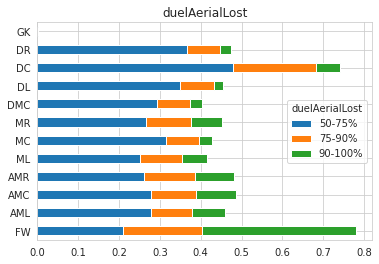

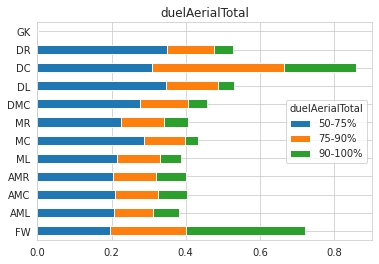

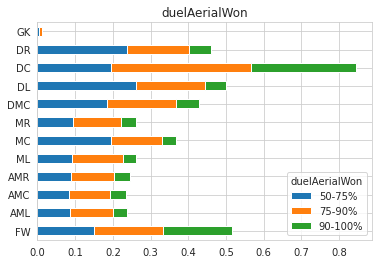

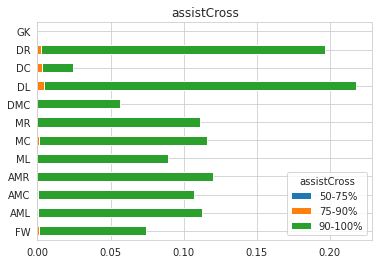

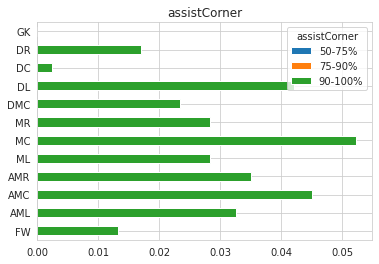

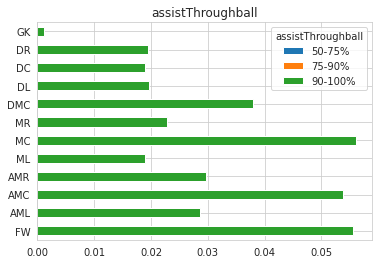

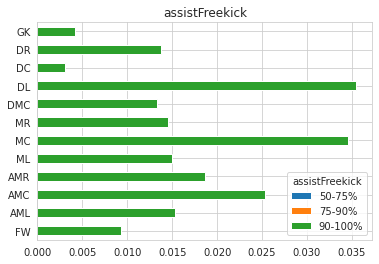

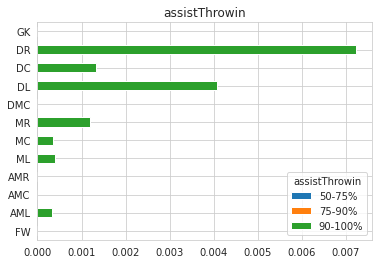

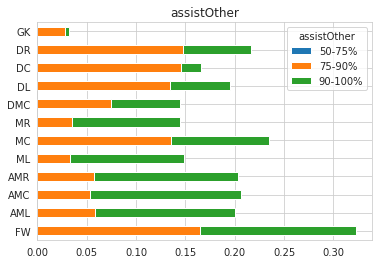

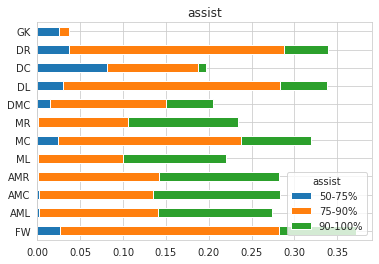

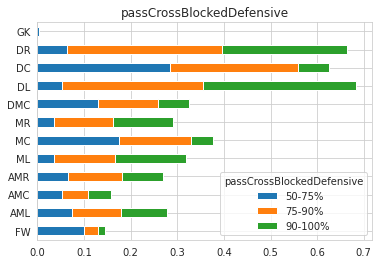

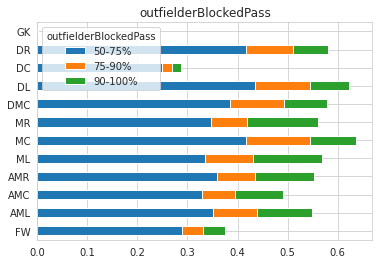

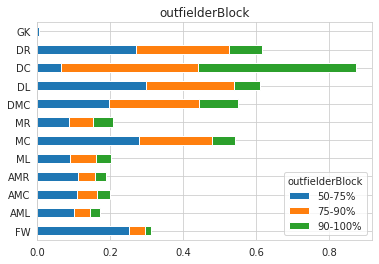

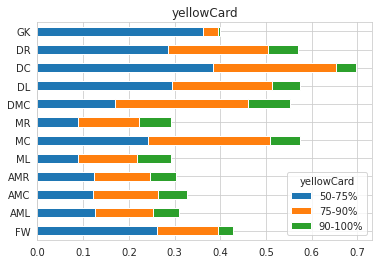

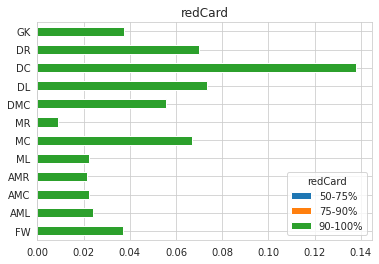

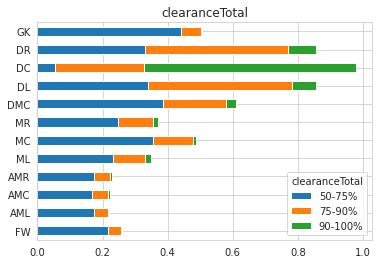

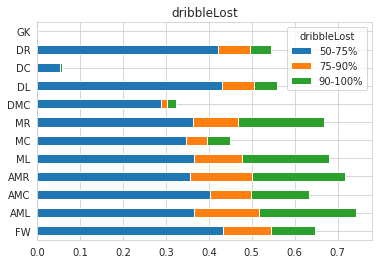

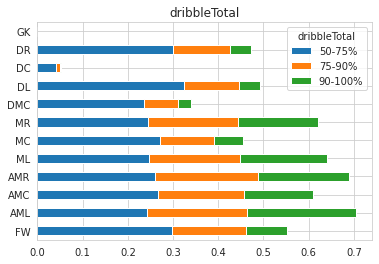

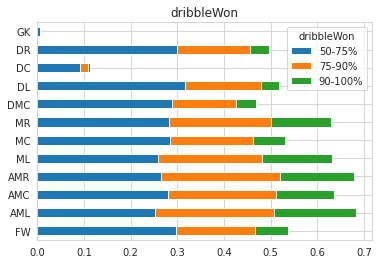

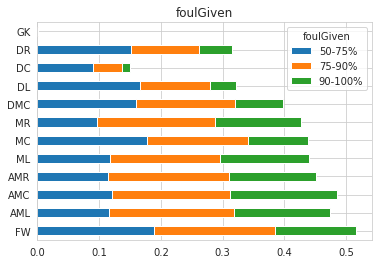

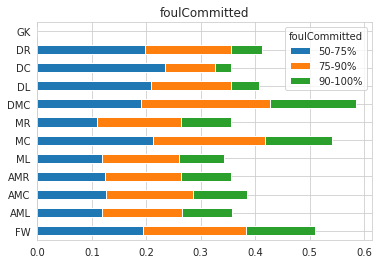

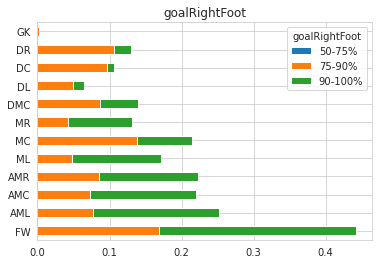

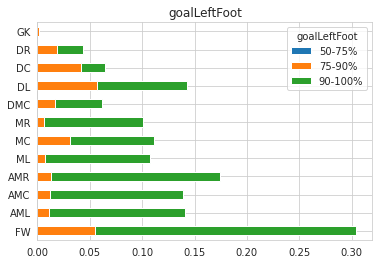

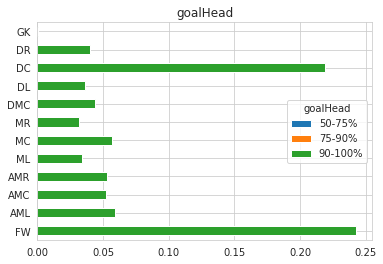

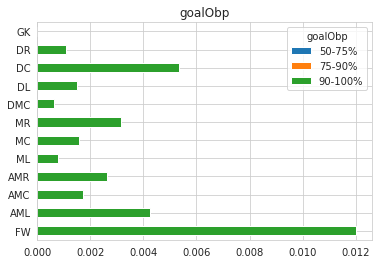

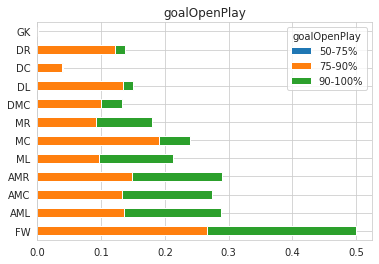

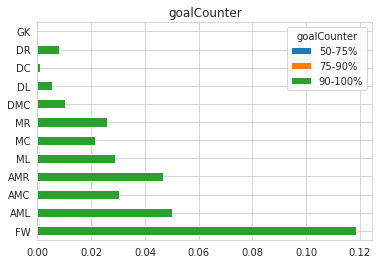

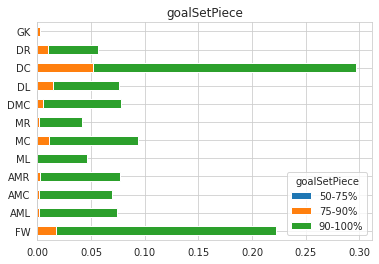

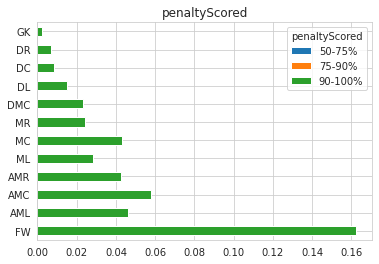

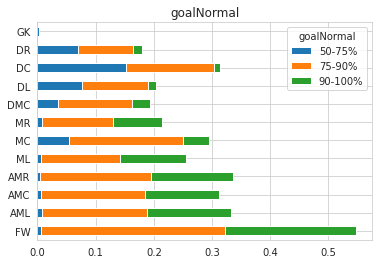

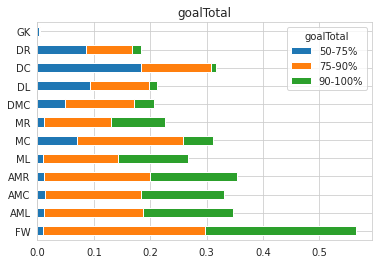

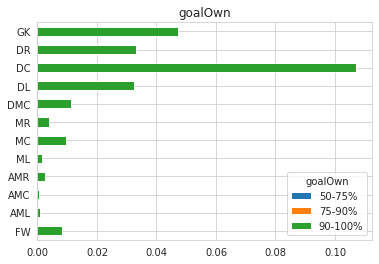

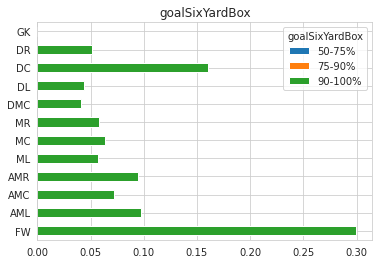

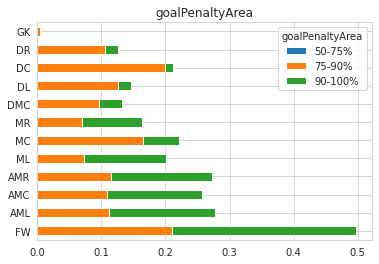

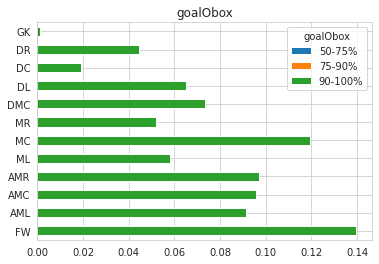

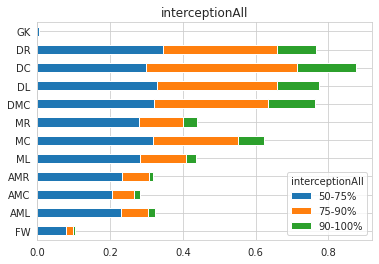

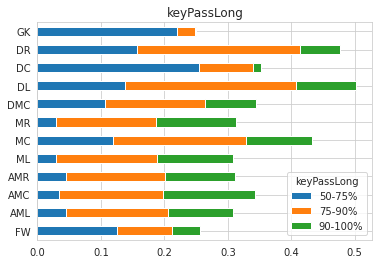

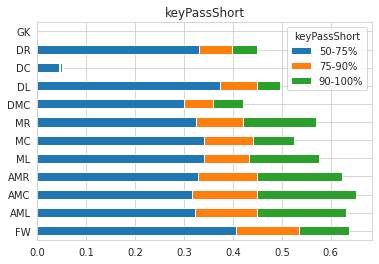

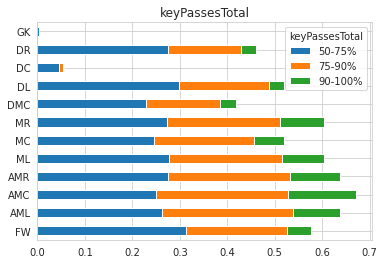

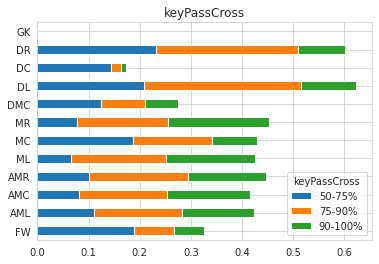

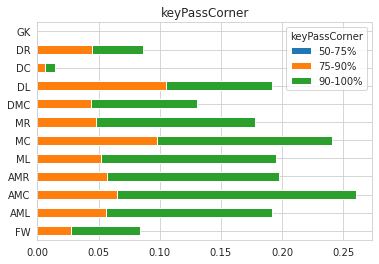

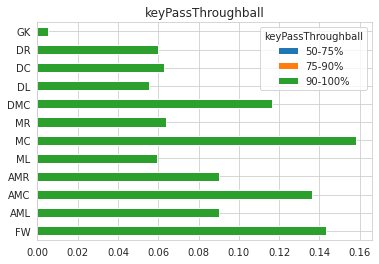

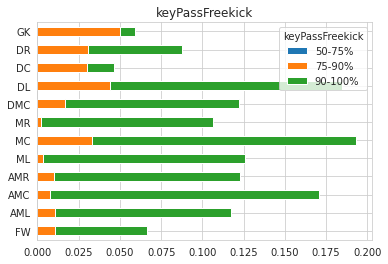

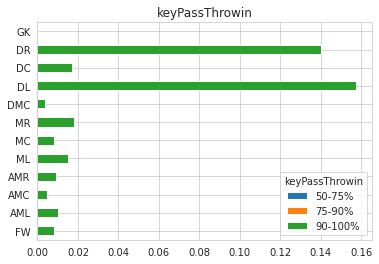

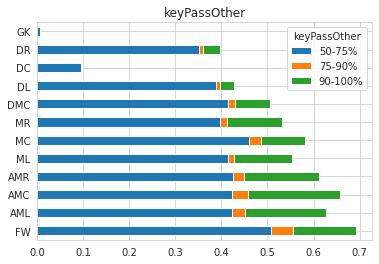

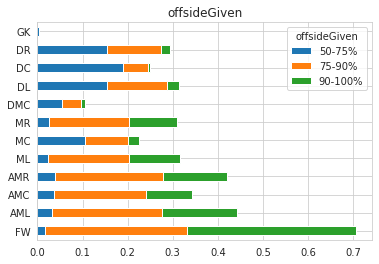

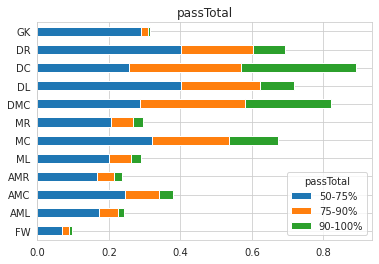

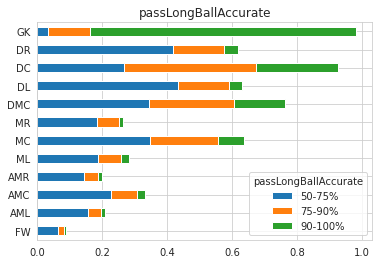

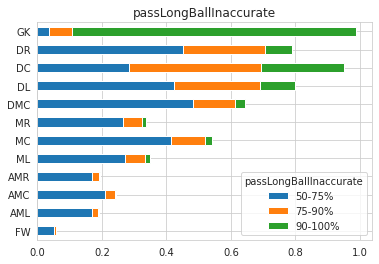

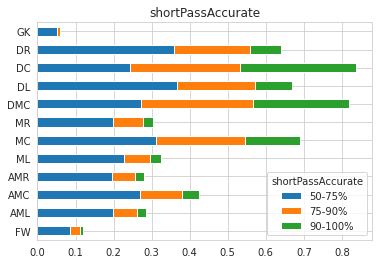

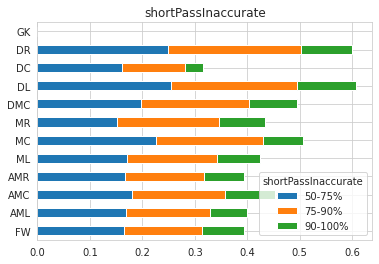

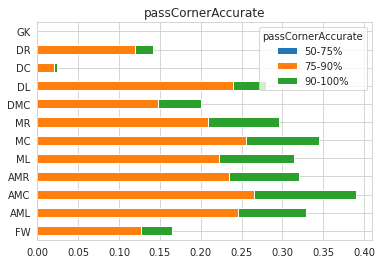

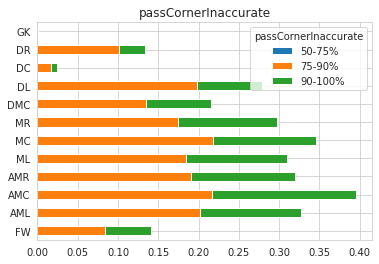

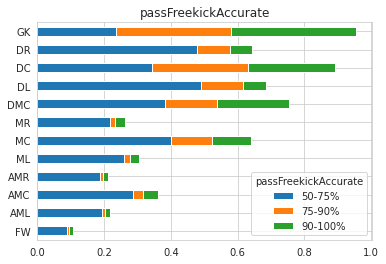

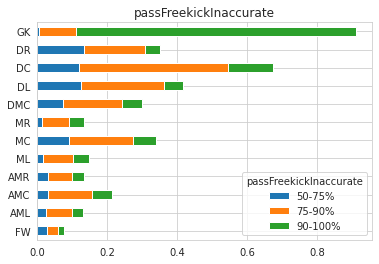

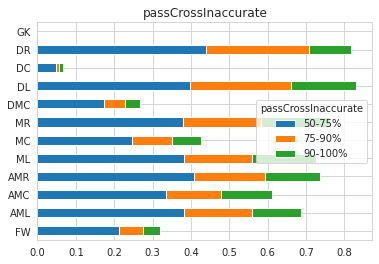

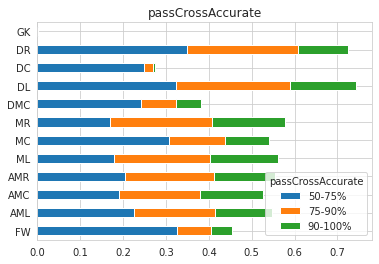

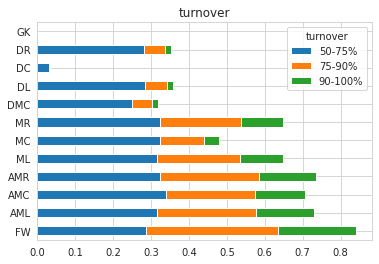

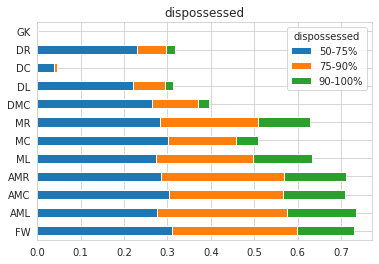

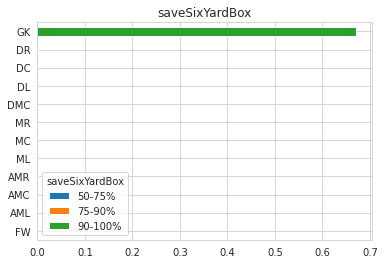

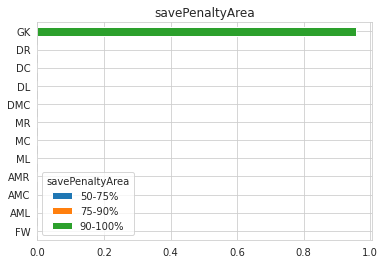

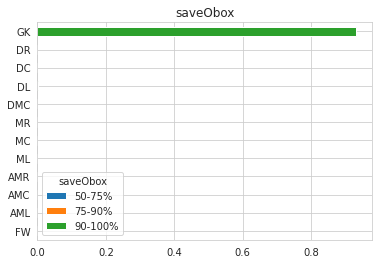

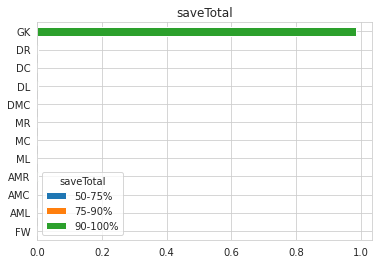

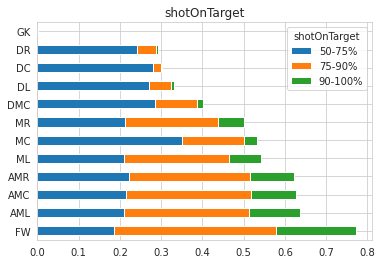

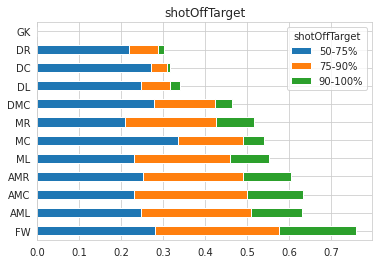

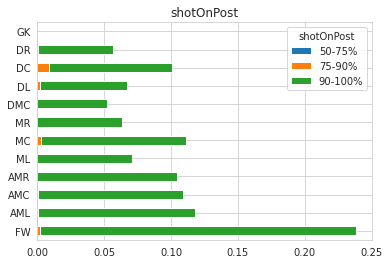

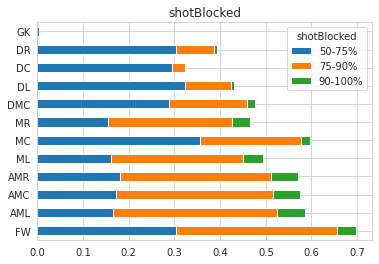

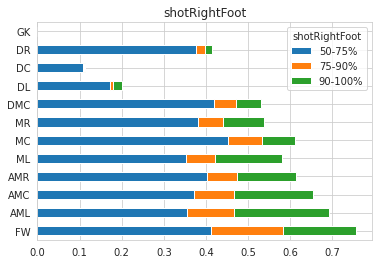

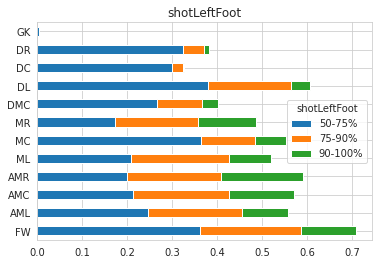

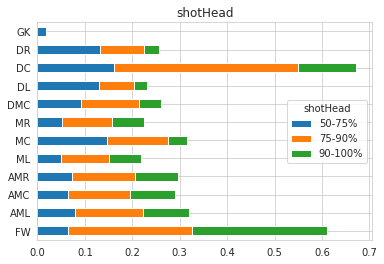

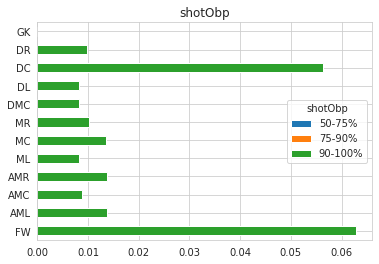

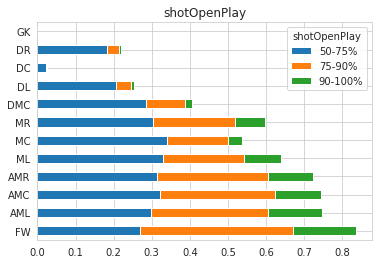

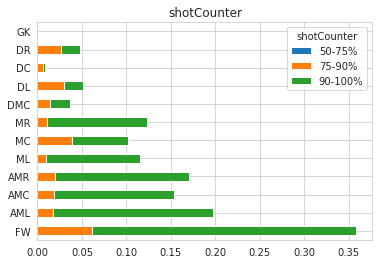

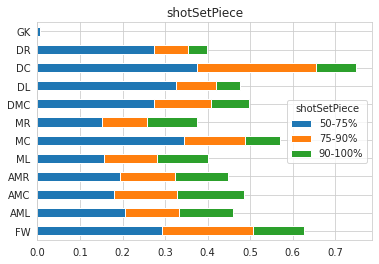

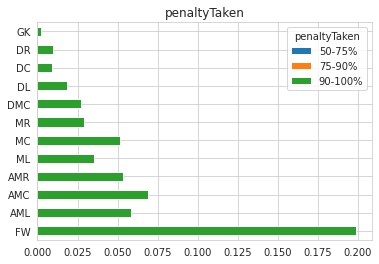

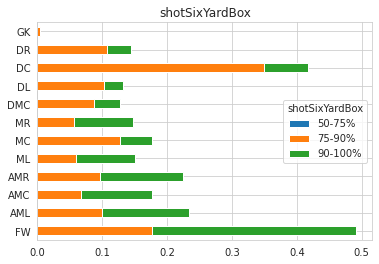

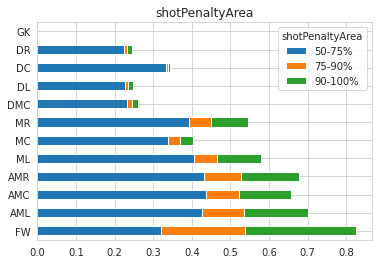

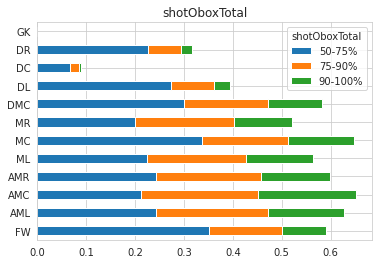

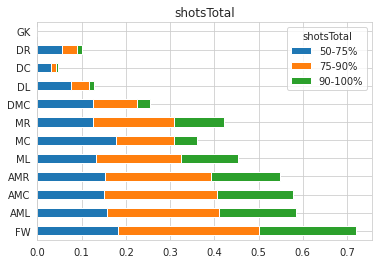

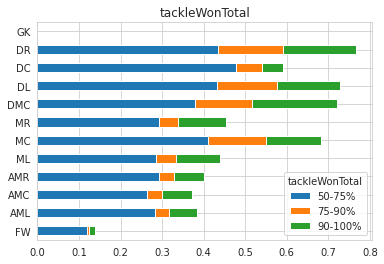

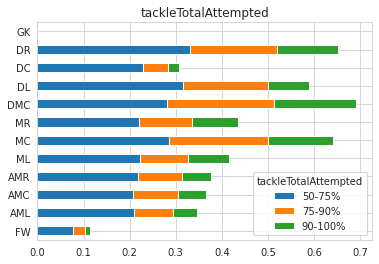

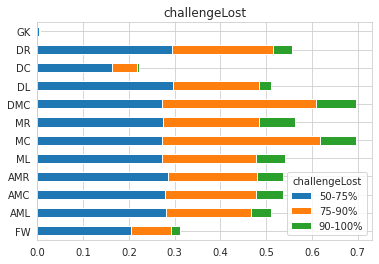

In [ ]:
def visualize_q_stackbar(attr):
    df_dict = get_quantile_dict(attr)
    q_df = pd.concat(df_dict, axis = 1)
    q_df.columns.name = attr
    display(q_df)
    q_df.plot.barh(stacked = True)
    plt.title(attr)
    return q_df
for attr in attrs:
    visualize_q_stackbar(attr)


# Pearson coefficient test

In [ ]:
features = [
    'clearanceTotal',
    'passLongBallAccurate',
    'passLongBallInaccurate',
    'shortPassAccurate',
    'shortPassInaccurate',
    
    'saveSixYardBox',
    'savePenaltyArea',
    # 'saveObox',
    'saveTotal',
    
    'keyPassLong',
    # 'keyPassFreekick',

    'goalOwn',
    
    'duelAerialLost',
    'duelAerialWon',
    
    # 'interceptionAll',
    'tackleWonTotal',
    'tackleTotalAttempted',
    # 'passCrossBlockedDefensive',
    # 'outfielderBlockedPass',
    # 'outfielderBlock',
    # 'shotCounter',
    'shotHead',
    'shotOnTarget',
    'shotPenaltyArea',

    # 'assistThroughball',
    # 'assistFreekick',
    # 'assistOther',
    'assist',
    'shotRightFoot',
    'penaltyTaken',

    # 'shotLeftFoot',
    
    # 'dribbleLost',
    # 'dribbleWon',
    # 'goalSetPiece',
    # 'goalObox',
    #'interceptionAll',
    # 'dispossessed',
    #'challengeLost'
]

In [ ]:
test_stat, p_value  = stats.ttest_rel(df_train.assist, df_train.rating, alternative = 'greater')  #Performing a paired t-test
print('The p-value is', p_value)

The p-value is 1.0


In [ ]:
for feature in features:
    print(feature, np.corrcoef(train_data[posCode][feature], train_data['GK'].rating))


clearanceTotal [[1.         0.10697656]
 [0.10697656 1.        ]]
passLongBallAccurate [[1.         0.08740886]
 [0.08740886 1.        ]]
passLongBallInaccurate [[1.         0.01701656]
 [0.01701656 1.        ]]
shortPassAccurate [[1.         0.03806808]
 [0.03806808 1.        ]]
shortPassInaccurate [[1.         0.01757809]
 [0.01757809 1.        ]]
saveSixYardBox [[1.         0.18917021]
 [0.18917021 1.        ]]
savePenaltyArea [[1.         0.48718478]
 [0.48718478 1.        ]]
saveTotal [[1.         0.52792516]
 [0.52792516 1.        ]]
keyPassLong [[1.         0.03679538]
 [0.03679538 1.        ]]
goalOwn [[ 1.        -0.0294447]
 [-0.0294447  1.       ]]
duelAerialLost [[ 1.         -0.01610248]
 [-0.01610248  1.        ]]
duelAerialWon [[1.         0.21173736]
 [0.21173736 1.        ]]
tackleWonTotal [[1.         0.04843855]
 [0.04843855 1.        ]]
tackleTotalAttempted [[ 1.         -0.08522892]
 [-0.08522892  1.        ]]
shotHead [[1.         0.02803246]
 [0.02803246 1.      

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


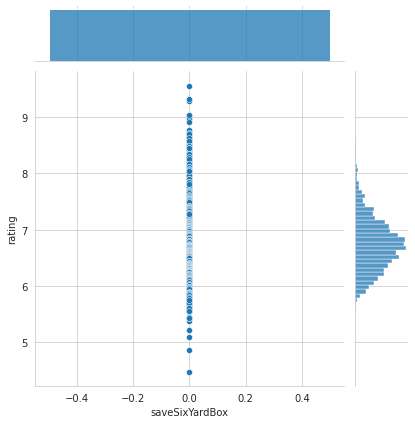

In [ ]:
sns.jointplot(train_data['FW'].saveSixYardBox, train_data['FW'].rating)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


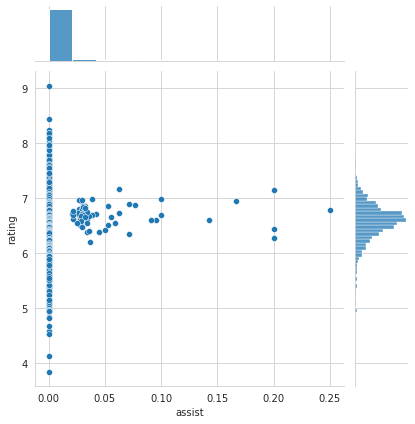

In [ ]:
sns.jointplot(train_data['GK'].assist, train_data['GK'].rating)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


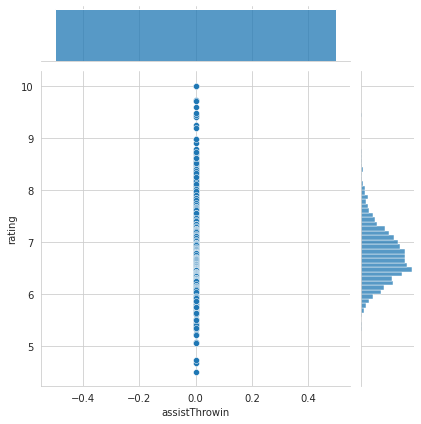

In [ ]:
sns.jointplot(train_data['AMC'].assistThrowin, train_data['AMC'].rating)
 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


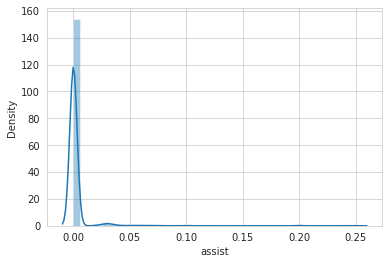

In [ ]:
sns.distplot(train_data['GK'].assist)

In [ ]:
# Feature score analysis

# Mutual information

In [ ]:
def mi_analyse(posCode, threshold = 0.25):
    chosen_features = set()
    for attr in attrs:
        score = mutual_info_score(train_data[posCode][attr], train_data[posCode].rating)
        print(posCode, attr, score)
        if score > threshold:
            chosen_features.add(attr)
    return chosen_features
mi_chosen_features_of_position = {
    posCode: mi_analyse(posCode) for posCode in positionCodes
}
        

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

FW duelAerialLost 4.247743818937283
FW duelAerialTotal 4.590192448327157
FW duelAerialWon 3.969557121348135
FW assistCross 0.4960050773629285
FW assistCorner 0.09953679040866653
FW assistThroughball 0.39644622677704305
FW assistFreekick 0.07384216791009386
FW assistThrowin 0.0
FW assistOther 1.7668373446521946
FW assist 1.9848234642638762
FW passCrossBlockedDefensive 0.8715686534097231
FW outfielderBlockedPass 3.1326762310335727
FW outfielderBlock 1.720115568320988
FW yellowCard 2.114420234964676
FW redCard 0.27054067832839335
FW clearanceTotal 3.1138889160024874
FW dribbleLost 3.3894409621872037
FW dribbleTotal 3.8482998557672543
FW dribbleWon 3.5184870811300133
FW foulGiven 3.6729074103038584
FW foulCommitted 3.593198659714708
FW goalRightFoot 2.344872816390443
FW goalLeftFoot 1.7369624250292586
FW goalHead 1.4439167388872411
FW goalObp 0.09992522692918901
FW goalOpenPlay 2.547774893030414
FW goalCounter 0.7812192737277504
FW goalSetPiece 1.3346181431943518
FW penaltyScored 1.0506861

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

FW goalOwn 0.06990691795265735
FW goalSixYardBox 1.7119595912006649
FW goalPenaltyArea 2.536799252894255
FW goalObox 0.8873068943283253
FW interceptionAll 2.7075122743621307
FW keyPassLong 1.4161746423311348
FW keyPassShort 3.37885714095226
FW keyPassesTotal 3.454983252753437
FW keyPassCross 1.6851004430545857
FW keyPassCorner 0.4626492351680488
FW keyPassThroughball 0.9029454251213093
FW keyPassFreekick 0.40770968305259936
FW keyPassThrowin 0.06914624501065392
FW keyPassOther 3.341592206958633
FW offsideGiven 3.1457598040133727
FW passTotal 5.263065847830478
FW passLongBallAccurate 3.20380950557064
FW passLongBallInaccurate 3.021114320370298
FW shortPassAccurate 5.050825188493411
FW shortPassInaccurate 4.360715408136177
FW passCornerAccurate 0.9010434879168563
FW passCornerInaccurate 0.7453496302375177
FW passFreekickAccurate 1.4586154866133607
FW passFreekickInaccurate 0.4728051653552532
FW passCrossInaccurate 3.4271108617183135
FW passCrossAccurate 2.268292522053443
FW turnover 3.82

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

FW shotBlocked 3.0359541288429623
FW shotRightFoot 3.511629818566516
FW shotLeftFoot 3.230926312718343
FW shotHead 2.990217962655961
FW shotObp 0.43905123798386625
FW shotOpenPlay 3.6353096816469987
FW shotCounter 1.911507074439998
FW shotSetPiece 2.933873985879378
FW penaltyTaken 1.2445294775500142
FW shotSixYardBox 2.507567204529919
FW shotPenaltyArea 3.5624415714091735
FW shotOboxTotal 3.17645311572096
FW shotsTotal 3.788869427865029
FW tackleWonTotal 3.2984165635967964
FW tackleTotalAttempted 3.638969755446624
FW challengeLost 3.186840162372269
AML duelAerialLost 2.6118146619659246
AML duelAerialTotal 2.909572017297335
AML duelAerialWon 2.4045310694005844
AML assistCross 0.6496143018875167
AML assistCorner 0.21883427235128053
AML assistThroughball 0.20424177874260074
AML assistFreekick 0.1177672588717044
AML assistThrowin 0.0017254069152827715
AML assistOther 1.038133467400908
AML assist 1.31881601972922
AML passCrossBlockedDefensive 1.2289724360708445
AML outfielderBlockedPass 2.2

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

AML dribbleWon 2.643687859828397
AML foulGiven 2.5542311690977435
AML foulCommitted 2.386908466539927
AML goalRightFoot 1.2704300847787566
AML goalLeftFoot 0.8014917468055152
AML goalHead 0.3755632364366548
AML goalObp 0.03676483232990687
AML goalOpenPlay 1.3792897420130608
AML goalCounter 0.32845333716867303
AML goalSetPiece 0.45441161822767767
AML penaltyScored 0.3081334589040672
AML goalNormal 1.5536319555379086
AML goalTotal 1.621889654826807
AML goalOwn 0.007292320173841257
AML goalSixYardBox 0.5797641136104176
AML goalPenaltyArea 1.3617332217298208
AML goalObox 0.5589908060541687
AML interceptionAll 2.116773513947985
AML keyPassLong 1.3771123104464116
AML keyPassShort 2.409162442418723
AML keyPassesTotal 2.4733119599621505
AML keyPassCross 1.7512136560035105
AML keyPassCorner 0.9678642211374401
AML keyPassThroughball 0.5210873564936842
AML keyPassFreekick 0.6338231687469642
AML keyPassThrowin 0.07564097602871306
AML keyPassOther 2.2939990843331373
AML offsideGiven 1.7589432129092

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

AML passCrossInaccurate 2.7493694863612683
AML passCrossAccurate 2.105362117263812
AML turnover 2.705765405676295
AML dispossessed 2.523991019235113
AML saveSixYardBox 0.0
AML savePenaltyArea 0.0
AML saveObox 0.0
AML saveTotal 0.0
AML shotOnTarget 2.226193267851513
AML shotOffTarget 2.1834785953153872
AML shotOnPost 0.6825029851094417
AML shotBlocked 2.034720569559842
AML shotRightFoot 2.443152973534599
AML shotLeftFoot 2.0820375184611413
AML shotHead 1.376340969276288
AML shotObp 0.10497864659266182
AML shotOpenPlay 2.5130167729239155
AML shotCounter 1.0146788291079045
AML shotSetPiece 1.7824491973853651
AML penaltyTaken 0.37487055349504533
AML shotSixYardBox 1.1232832180584424
AML shotPenaltyArea 2.3570642699706785
AML shotOboxTotal 2.2137232840409733
AML shotsTotal 2.6248933261126766
AML tackleWonTotal 2.4531817292176763
AML tackleTotalAttempted 2.7043324567368523
AML challengeLost 2.2867358561144564
AMC duelAerialLost 2.5057573030292386
AMC duelAerialTotal 2.8005672762969933
AMC du

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/p

assistFreekick 0.1837682312353565
AMC assistThrowin 0.0
AMC assistOther 1.0076561675293862
AMC assist 1.295920105306505
AMC passCrossBlockedDefensive 0.7480315892297024
AMC outfielderBlockedPass 2.0749525905250645
AMC outfielderBlock 0.8952361766249743
AMC yellowCard 1.2824571365474524
AMC redCard 0.1522306153078953
AMC clearanceTotal 1.8147717748880217
AMC dribbleLost 2.1838387723341124
AMC dribbleTotal 2.691994003586463
AMC dribbleWon 2.405631886699206
AMC foulGiven 2.3783773358768547
AMC foulCommitted 2.281729718583973
AMC goalRightFoot 1.0973145291688924
AMC goalLeftFoot 0.7626670290690749
AMC goalHead 0.3217152182519019
AMC goalObp 0.012349011274217045
AMC goalOpenPlay 1.2701158083628665
AMC goalCounter 0.20387380557102153
AMC goalSetPiece 0.4253770537720605
AMC penaltyScored 0.37804731350325316
AMC goalNormal 1.4037912995558173
AMC goalTotal 1.475775419389115
AMC goalOwn 0.003594429433427053
AMC goalSixYardBox 0.4225444718320758
AMC goalPenaltyArea 1.227302901127783
AMC goalObox 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

 keyPassCorner 1.2019450646999879
AMC keyPassThroughball 0.7367286818378893
AMC keyPassFreekick 0.8864038113503611
AMC keyPassThrowin 0.03590479954479819
AMC keyPassOther 2.1732138021900225
AMC offsideGiven 1.348403821155098
AMC passTotal 4.18900367949247
AMC passLongBallAccurate 2.4338736388241635
AMC passLongBallInaccurate 2.2810628610688997
AMC shortPassAccurate 4.0498438236308445
AMC shortPassInaccurate 2.979120155600911
AMC passCornerAccurate 1.6399067990543572
AMC passCornerInaccurate 1.698323018804564
AMC passFreekickAccurate 1.7255007664316833
AMC passFreekickInaccurate 1.0201181383163316
AMC passCrossInaccurate 2.6419143979986064
AMC passCrossAccurate 1.9830395997011352
AMC turnover 2.524998000899419
AMC dispossessed 2.340859089634789
AMC saveSixYardBox 0.0
AMC savePenaltyArea 0.0
AMC saveObox 0.0
AMC saveTotal 0.0
AMC shotOnTarget 2.084627714154785
AMC shotOffTarget 2.064565210712774
AMC shotOnPost 0.6053965919117302
AMC shotBlocked 1.8989727959757037
AMC shotRightFoot 2.2130

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

AMC shotPenaltyArea 2.1497461386035277
AMC shotOboxTotal 2.1280341277289536
AMC shotsTotal 2.483760630660566
AMC tackleWonTotal 2.3398887437266485
AMC tackleTotalAttempted 2.5713200310686526
AMC challengeLost 2.183305653706898
AMR duelAerialLost 2.6704023279744433
AMR duelAerialTotal 2.9410050363972076
AMR duelAerialWon 2.4039904299890917
AMR assistCross 0.6825075729678118
AMR assistCorner 0.23432469782785642
AMR assistThroughball 0.2085818129483249
AMR assistFreekick 0.1356932791506788
AMR assistThrowin 0.0
AMR assistOther 1.0644569818536782
AMR assist 1.341206962800165
AMR passCrossBlockedDefensive 1.187441221173855
AMR outfielderBlockedPass 2.2537016811918242
AMR outfielderBlock 0.9248601413169331
AMR yellowCard 1.2964490763870424
AMR redCard 0.1501112301880823
AMR clearanceTotal 1.9895473752827835
AMR dribbleLost 2.4790902600537326
AMR dribbleTotal 2.898019799965928
AMR dribbleWon 2.6268972019549945
AMR foulGiven 2.477628473822686
AMR foulCommitted 2.4189666513822448
AMR goalRightF

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

AMR goalTotal 1.5946330967540194
AMR goalOwn 0.019841549141132522
AMR goalSixYardBox 0.5602143019773884
AMR goalPenaltyArea 1.3259297626646622
AMR goalObox 0.5785717807990411
AMR interceptionAll 2.1196451319279106
AMR keyPassLong 1.4433883055766739
AMR keyPassShort 2.3870321660174056
AMR keyPassesTotal 2.491796483030926
AMR keyPassCross 1.8391394968768036
AMR keyPassCorner 1.0062740966881334
AMR keyPassThroughball 0.525395877379284
AMR keyPassFreekick 0.6832781500020819
AMR keyPassThrowin 0.0658305611992746
AMR keyPassOther 2.2653515442633836
AMR offsideGiven 1.688035996499818
AMR passTotal 4.286463366064302
AMR passLongBallAccurate 2.4133188763845075
AMR passLongBallInaccurate 2.373580586919272
AMR shortPassAccurate 4.103021202558212
AMR shortPassInaccurate 3.1549479556696207
AMR passCornerAccurate 1.4835535227189518
AMR passCornerInaccurate 1.5145933552255793
AMR passFreekickAccurate 1.444626460091458
AMR passFreekickInaccurate 0.7145412529601004
AMR passCrossInaccurate 2.82179516755

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

AMR shotLeftFoot 2.261301060683838
AMR shotHead 1.3058279128341757
AMR shotObp 0.09877401096951188
AMR shotOpenPlay 2.496032111920087
AMR shotCounter 0.9081927761378693
AMR shotSetPiece 1.7712234814019083
AMR penaltyTaken 0.34886099721905495
AMR shotSixYardBox 1.07546686043047
AMR shotPenaltyArea 2.366079491174121
AMR shotOboxTotal 2.177747825719413
AMR shotsTotal 2.6202383734116284
AMR tackleWonTotal 2.520357215366971
AMR tackleTotalAttempted 2.7469937566268965
AMR challengeLost 2.305891487611613
ML duelAerialLost 2.2363643825491337
ML duelAerialTotal 2.5597986696038495
ML duelAerialWon 2.103320261080217
ML assistCross 0.5097818200836395
ML assistCorner 0.19046541259918875
ML assistThroughball 0.13095769995170148
ML assistFreekick 0.11535396206322429
ML assistThrowin 0.0034838551243713814
ML assistOther 0.7313858916278068
ML assist 0.9922738447187716
ML passCrossBlockedDefensive 1.2582163746163635
ML outfielderBlockedPass 1.9554708883005059
ML outfielderBlock 0.8809485290030189
ML yel

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

 0.006967554820371977
ML goalOpenPlay 0.9846870938799609
ML goalCounter 0.1862652529592618
ML goalSetPiece 0.26770622925481713
ML penaltyScored 0.1846269125141398
ML goalNormal 1.1222134218260469
ML goalTotal 1.1703519408521061
ML goalOwn 0.011859792424362563
ML goalSixYardBox 0.3120879299438878
ML goalPenaltyArea 0.9447101649494041
ML goalObox 0.36182102466582444
ML interceptionAll 1.9446150764674692
ML keyPassLong 1.2474799055688666
ML keyPassShort 2.0117513137664265
ML keyPassesTotal 2.130483653664914
ML keyPassCross 1.5635669188882193
ML keyPassCorner 0.8635286368631679
ML keyPassThroughball 0.3548838812070745
ML keyPassFreekick 0.6069783764645156
ML keyPassThrowin 0.10296703742895785
ML keyPassOther 1.8857967489108651
ML offsideGiven 1.217619231033206
ML passTotal 4.011955775976139
ML passLongBallAccurate 2.1850648120602747
ML passLongBallInaccurate 2.2585383914976864
ML shortPassAccurate 3.848440782281801
ML shortPassInaccurate 2.7915854593074236
ML passCornerAccurate 1.292340373

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

ML shotOnTarget 1.7286303887067695
ML shotOffTarget 1.7554698656305407
ML shotOnPost 0.4080159584662695
ML shotBlocked 1.5913551888339628
ML shotRightFoot 1.9373364098085286
ML shotLeftFoot 1.7053608199593475
ML shotHead 0.9297435920499564
ML shotObp 0.05920039238722479
ML shotOpenPlay 2.094896893891645
ML shotCounter 0.5801498900282402
ML shotSetPiece 1.4595459340038688
ML penaltyTaken 0.22114917615910754
ML shotSixYardBox 0.7111661254990866
ML shotPenaltyArea 1.9689421052307718
ML shotOboxTotal 1.8518910937298507
ML shotsTotal 2.2522672011462417
ML tackleWonTotal 2.252194538851899
ML tackleTotalAttempted 2.4528206587204195
ML challengeLost 2.0043002400860104
MC duelAerialLost 3.5542367068964134
MC duelAerialTotal 3.98237304613193
MC duelAerialWon 3.597159150668591
MC assistCross 0.7445110976689945
MC assistCorner 0.3775437964168494
MC assistThroughball 0.38883020722161443
MC assistFreekick 0.26195267773313935
MC assistThrowin 0.0033678073552685177
MC assistOther 1.3267870235101897
MC

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

1.1424719128213217
MC keyPassThrowin 0.06820040199345101
MC keyPassOther 3.2050410327765793
MC offsideGiven 1.2238615653102016
MC passTotal 5.652267586541578
MC passLongBallAccurate 3.978373687959527
MC passLongBallInaccurate 3.8754256081234706
MC shortPassAccurate 5.572726916185249
MC shortPassInaccurate 4.264105899128401
MC passCornerAccurate 1.905081419173426
MC passCornerInaccurate 1.9533278023648404
MC passFreekickAccurate 3.370673390581705
MC passFreekickInaccurate 1.840297094190558
MC passCrossInaccurate 3.5835720649022837
MC passCrossAccurate 2.7352580637199786
MC turnover 3.565058393109415
MC dispossessed 3.3840085862148817
MC saveSixYardBox 0.0
MC savePenaltyArea 0.0
MC saveObox 0.0
MC saveTotal 0.0
MC shotOnTarget 2.780794077849002
MC shotOffTarget 3.003993873109553
MC shotOnPost 0.6898873988329993
MC shotBlocked 2.723917772911422
MC shotRightFoot 3.206136032829133
MC shotLeftFoot 2.665327394429678
MC shotHead 1.6567863785625263
MC shotObp 0.10354964442625983
MC shotOpenPlay

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

MC shotCounter 0.6327613467843336
MC shotSetPiece 2.691006530781016
MC penaltyTaken 0.3795651118464827
MC shotSixYardBox 1.0292864219183517
MC shotPenaltyArea 2.961895807350596
MC shotOboxTotal 3.23306361357235
MC shotsTotal 3.5525981319837614
MC tackleWonTotal 3.711786442780559
MC tackleTotalAttempted 3.9652759864747877
MC challengeLost 3.4795694473190184
MR duelAerialLost 2.2844499431610292
MR duelAerialTotal 2.5091007051907552
MR duelAerialWon 2.069167668897089
MR assistCross 0.6032478515792903
MR assistCorner 0.18981760496564654
MR assistThroughball 0.14950286988673883
MR assistFreekick 0.1024082866760391
MR assistThrowin 0.009204132624407117
MR assistOther 0.719949791789477
MR assist 1.041320958052089
MR passCrossBlockedDefensive 1.1341953730929992
MR outfielderBlockedPass 1.954671589636523
MR outfielderBlock 0.8674933903987048
MR yellowCard 1.0752472172911884
MR redCard 0.061074009496137824
MR clearanceTotal 1.8991411785668972
MR dribbleLost 2.081625535185224
MR dribbleTotal 2.44

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

MR goalLeftFoot 0.5529572793256216
MR goalHead 0.2057453254606944
MR goalObp 0.02490237136140881
MR goalOpenPlay 0.8817304162317787
MR goalCounter 0.17894323901670697
MR goalSetPiece 0.25843211050414233
MR penaltyScored 0.161137427102727
MR goalNormal 1.0200271367951084
MR goalTotal 1.0547653269949602
MR goalOwn 0.027616254878922566
MR goalSixYardBox 0.3409933023817696
MR goalPenaltyArea 0.8070843889266242
MR goalObox 0.32738650058056096
MR interceptionAll 1.8897994796978859
MR keyPassLong 1.2464905313983474
MR keyPassShort 2.036309421227369
MR keyPassesTotal 2.1209406262122803
MR keyPassCross 1.6153992216674078
MR keyPassCorner 0.8208515949788531
MR keyPassThroughball 0.3628397274833943
MR keyPassFreekick 0.5486024468571683
MR keyPassThrowin 0.12338085952103453
MR keyPassOther 1.88822435210538
MR offsideGiven 1.1802207493388626
MR passTotal 3.9492193606494252
MR passLongBallAccurate 2.0951821314090457
MR passLongBallInaccurate 2.2075541132812426
MR shortPassAccurate 3.8272144272824242

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l


MR turnover 2.2446308906271804
MR dispossessed 2.1247428454994113
MR saveSixYardBox 0.0
MR savePenaltyArea 0.0
MR saveObox 0.0
MR saveTotal 0.0
MR shotOnTarget 1.701301728527774
MR shotOffTarget 1.7628959744697053
MR shotOnPost 0.3659318434323533
MR shotBlocked 1.5420787756995684
MR shotRightFoot 1.8430649092640368
MR shotLeftFoot 1.6974939505890356
MR shotHead 0.9300995794514602
MR shotObp 0.06693425452285372
MR shotOpenPlay 2.0863929231990235
MR shotCounter 0.6161625488504514
MR shotSetPiece 1.3623018985916817
MR penaltyTaken 0.18464143212150713
MR shotSixYardBox 0.698914749214507
MR shotPenaltyArea 1.868439303135581
MR shotOboxTotal 1.769937443838089
MR shotsTotal 2.2023760713786844
MR tackleWonTotal 2.188830988961249
MR tackleTotalAttempted 2.431965504815425
MR challengeLost 2.03094506918159
DMC duelAerialLost 3.081248906032432
DMC duelAerialTotal 3.558458661067044
DMC duelAerialWon 3.2171107845456905
DMC assistCross 0.3741253142575706
DMC assistCorner 0.17245149446353522
DMC assi

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8

3.0787899348968852
DMC dribbleLost 2.366553202699907
DMC dribbleTotal 3.097916053469449
DMC dribbleWon 2.88110873201921
DMC foulGiven 3.0455523612732573
DMC foulCommitted 3.0979214038625384
DMC goalRightFoot 0.823658947738275
DMC goalLeftFoot 0.4021357508382954
DMC goalHead 0.3046354961170446
DMC goalObp 0.005300124573936926
DMC goalOpenPlay 0.7724606220065326
DMC goalCounter 0.08086166164802387
DMC goalSetPiece 0.506365568423959
DMC penaltyScored 0.17399560690514485
DMC goalNormal 1.0675414204641336
DMC goalTotal 1.1320984209726181
DMC goalOwn 0.08373969718814955
DMC goalSixYardBox 0.27960458400357924
DMC goalPenaltyArea 0.7798224668136964
DMC goalObox 0.47766570542491105
DMC interceptionAll 3.07323945163664
DMC keyPassLong 1.6833319440374064
DMC keyPassShort 2.714968635462589
DMC keyPassesTotal 2.855067432672887
DMC keyPassCross 1.403443179627223
DMC keyPassCorner 0.7322622063903466
DMC keyPassThroughball 0.6848660809431409
DMC keyPassFreekick 0.7064431835276523
DMC keyPassThrowin 0.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

DMC passCrossInaccurate 2.723186669329222
DMC passCrossAccurate 1.835988581553197
DMC turnover 2.9861230220724937
DMC dispossessed 2.780705004137765
DMC saveSixYardBox 0.0
DMC savePenaltyArea 0.0
DMC saveObox 0.0
DMC saveTotal 0.0
DMC shotOnTarget 2.1147626303240874
DMC shotOffTarget 2.4718384351052
DMC shotOnPost 0.3432034855525991
DMC shotBlocked 2.1307412203996767
DMC shotRightFoot 2.601264284140795
DMC shotLeftFoot 1.9005038160449808
DMC shotHead 1.3337859816509618
DMC shotObp 0.06425272708802066
DMC shotOpenPlay 2.72470891732885
DMC shotCounter 0.25520424903362016
DMC shotSetPiece 2.2186995827203497
DMC penaltyTaken 0.19753432732060877
DMC shotSixYardBox 0.7459629143634554
DMC shotPenaltyArea 2.2002374786796732
DMC shotOboxTotal 2.696850100076638
DMC shotsTotal 2.944334761258535
DMC tackleWonTotal 3.277786896176776
DMC tackleTotalAttempted 3.517699283382806
DMC challengeLost 3.000336125890614
DL duelAerialLost 3.83418198307512
DL duelAerialTotal 4.297431284565796
DL duelAerialWon 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8

1.9245066898997676
DL passCrossBlockedDefensive 3.1924261445656867
DL outfielderBlockedPass 3.5759083198860235
DL outfielderBlock 2.941675823203326
DL yellowCard 2.658908844494437
DL redCard 0.4928678457645007
DL clearanceTotal 4.028104118432371
DL dribbleLost 3.4783080227765755
DL dribbleTotal 4.005379391983357
DL dribbleWon 3.697122602600329
DL foulGiven 3.7623161848494986
DL foulCommitted 3.749819802715856
DL goalRightFoot 0.4459732309813381
DL goalLeftFoot 0.9390254722638498
DL goalHead 0.27159519379279407
DL goalObp 0.01223898621161824
DL goalOpenPlay 0.9633435555185936
DL goalCounter 0.04627853048588674
DL goalSetPiece 0.5293107242995658
DL penaltyScored 0.12694535249923283
DL goalNormal 1.2572545252073073
DL goalTotal 1.303359585333611
DL goalOwn 0.24029768559558873
DL goalSixYardBox 0.31712862398588093
DL goalPenaltyArea 0.9509617314829124
DL goalObox 0.46869999639108373
DL interceptionAll 3.8338424345359363
DL keyPassLong 2.6774448099659045
DL keyPassShort 3.470660582541214
DL

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

DL keyPassThrowin 1.0007785831183131
DL keyPassOther 3.24900828706237
DL offsideGiven 1.7695332269741786
DL passTotal 5.777382937506555
DL passLongBallAccurate 4.148623615086233
DL passLongBallInaccurate 4.446755159074646
DL shortPassAccurate 5.695919486512063
DL shortPassInaccurate 4.590722813708183
DL passCornerAccurate 1.78477461721805
DL passCornerInaccurate 1.8266620410754202
DL passFreekickAccurate 3.571801126354144
DL passFreekickInaccurate 2.297400954905732
DL passCrossInaccurate 4.292061982169882
DL passCrossAccurate 3.54291262089878
DL turnover 3.75221541741537
DL dispossessed 3.5461488640672667
DL saveSixYardBox 0.0
DL savePenaltyArea 0.0
DL saveObox 0.003291191247916326
DL saveTotal 0.003291191247916326
DL shotOnTarget 2.5699196981133223
DL shotOffTarget 3.0162289385186547
DL shotOnPost 0.4765455863442922
DL shotBlocked 2.575225776471833
DL shotRightFoot 2.32344632543748
DL shotLeftFoot 3.090418869926938
DL shotHead 1.3467212811603986
DL shotObp 0.06596337159876035
DL shotO

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

DL shotPenaltyArea 2.8979244206269357
DL shotOboxTotal 3.0428086006487907
DL shotsTotal 3.5003482528308303
DL tackleWonTotal 4.0112076167833886
DL tackleTotalAttempted 4.246215965340825
DL challengeLost 3.624480099423807
DC duelAerialLost 4.755552571505105
DC duelAerialTotal 5.385770790732847
DC duelAerialWon 5.087917867530922
DC assistCross 0.19172758030374526
DC assistCorner 0.021625337733287748
DC assistThroughball 0.14954340448208558
DC assistFreekick 0.0283730519937231
DC assistThrowin 0.012530802435158535
DC assistOther 1.0598512562667322
DC assist 1.2227355523345176
DC passCrossBlockedDefensive 3.2167263078637287
DC outfielderBlockedPass 3.9589194180650256
DC outfielderBlock 4.177992446935692
DC yellowCard 3.368730637796288
DC redCard 0.875024833659175
DC clearanceTotal 5.1841851076001575
DC dribbleLost 2.5220100678118875
DC dribbleTotal 3.8415077424417623
DC dribbleWon 3.6069696101837696
DC foulGiven 4.258734079879814
DC foulCommitted 4.396664617379799
DC goalRightFoot 0.728872

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

1.7669032823331943
DC penaltyScored 0.07497843631966804
DC goalNormal 1.855011040453833
DC goalTotal 1.8801016551261653
DC goalOwn 0.7058592528990679
DC goalSixYardBox 1.0391476274104121
DC goalPenaltyArea 1.3263720061110411
DC goalObox 0.15704762509162157
DC interceptionAll 4.610084310075087
DC keyPassLong 2.033828932601617
DC keyPassShort 3.2885694513700576
DC keyPassesTotal 3.5106698510806087
DC keyPassCross 1.0990355718508384
DC keyPassCorner 0.10432061067176497
DC keyPassThroughball 0.450402511999651
DC keyPassFreekick 0.3481654873069115
DC keyPassThrowin 0.13918243848281986
DC keyPassOther 3.346055716045162
DC offsideGiven 1.525906489027959
DC passTotal 6.734407937715922
DC passLongBallAccurate 5.254459834668973
DC passLongBallInaccurate 5.374946924152487
DC shortPassAccurate 6.694909210868001
DC shortPassInaccurate 5.378941728316828
DC passCornerAccurate 0.1724266599245747
DC passCornerInaccurate 0.18341310149845805
DC passFreekickAccurate 4.679322054457647
DC passFreekickInaccu

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

DC saveTotal 0.0
DC shotOnTarget 2.992243753074699
DC shotOffTarget 3.5635098586302387
DC shotOnPost 0.6752971064139153
DC shotBlocked 2.7001342171895315
DC shotRightFoot 2.756461413411251
DC shotLeftFoot 2.242436147963917
DC shotHead 3.5822660351633187
DC shotObp 0.41550954257945893
DC shotOpenPlay 2.3619657046257694
DC shotCounter 0.07644637340139769
DC shotSetPiece 3.8530003398866812
DC penaltyTaken 0.08028479422328297
DC shotSixYardBox 2.349794475834078
DC shotPenaltyArea 3.7466767760286195
DC shotOboxTotal 2.23529523131167
DC shotsTotal 4.017498279182026
DC tackleWonTotal 4.6254109903161265
DC tackleTotalAttempted 4.814328562889178
DC challengeLost 4.0533090383327055
DR duelAerialLost 3.8208591688729223
DR duelAerialTotal 4.239675789125087
DR duelAerialWon 3.900921892347122
DR assistCross 1.2028081409411868
DR assistCorner 0.13104113146062102
DR assistThroughball 0.15363964297668659
DR assistFreekick 0.10954657871541601
DR assistThrowin 0.06271301309712932
DR assistOther 1.2897050

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

outfielderBlockedPass 3.4676956731416197
DR outfielderBlock 2.9461681794065617
DR yellowCard 2.623188600209766
DR redCard 0.4745969487259724
DR clearanceTotal 3.9731678321074337
DR dribbleLost 3.4586602901193677
DR dribbleTotal 3.9271070126854726
DR dribbleWon 3.5780226314433037
DR foulGiven 3.655934103149571
DR foulCommitted 3.677921695950375
DR goalRightFoot 0.8476758483572137
DR goalLeftFoot 0.3154652654598618
DR goalHead 0.29918284598009176
DR goalObp 0.008490749656602424
DR goalOpenPlay 0.8856979261393038
DR goalCounter 0.06547469096279078
DR goalSetPiece 0.4093455459148256
DR penaltyScored 0.05528758036153623
DR goalNormal 1.1179612728223631
DR goalTotal 1.1358744585822413
DR goalOwn 0.24575057348899762
DR goalSixYardBox 0.372313355835156
DR goalPenaltyArea 0.8156535252803535
DR goalObox 0.3295259005058924
DR interceptionAll 3.7412577076047815
DR keyPassLong 2.50803406905316
DR keyPassShort 3.435716262562594
DR keyPassesTotal 3.555002284518344
DR keyPassCross 3.0082076141228082
D

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

DR shortPassInaccurate 4.5057496295654795
DR passCornerAccurate 0.9433982681848191
DR passCornerInaccurate 0.9066436452214683
DR passFreekickAccurate 3.444869718738454
DR passFreekickInaccurate 1.9689506709248452
DR passCrossInaccurate 4.133531277733651
DR passCrossAccurate 3.4171640446376164
DR turnover 3.6920647961959725
DR dispossessed 3.433634964631201
DR saveSixYardBox 0.0027263366000751317
DR savePenaltyArea 0.0
DR saveObox 0.0
DR saveTotal 0.0027263366000751317
DR shotOnTarget 2.374029275554308
DR shotOffTarget 2.8505055917393527
DR shotOnPost 0.39392913487661413
DR shotBlocked 2.4101055703949354
DR shotRightFoot 3.0486678322634075
DR shotLeftFoot 2.1290253752349004
DR shotHead 1.4562654028507216
DR shotObp 0.0783180184954201
DR shotOpenPlay 3.0950166167890814
DR shotCounter 0.34028837141660556
DR shotSetPiece 2.4195591846556583
DR penaltyTaken 0.07402222711553381
DR shotSixYardBox 0.9039697718778688
DR shotPenaltyArea 2.8243919672181867
DR shotOboxTotal 2.816782743990149
DR sho

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

assistCross 0.0
GK assistCorner 0.0
GK assistThroughball 0.010158884332080688
GK assistFreekick 0.035549702154880215
GK assistThrowin 0.0
GK assistOther 0.24301870377378976
GK assist 0.27846513806858225
GK passCrossBlockedDefensive 0.01947917401355944
GK outfielderBlockedPass 0.8125851682503229
GK outfielderBlock 0.025394472075560108
GK yellowCard 2.3178740887036087
GK redCard 0.27667243821464904
GK clearanceTotal 4.5975283906141335
GK dribbleLost 0.15884370328413067
GK dribbleTotal 1.3923022817255333
GK dribbleWon 1.336770308028976
GK foulGiven 3.5333735529160464
GK foulCommitted 1.496602937250116
GK goalRightFoot 0.019479174013559444
GK goalLeftFoot 0.015237778968060289
GK goalHead 0.005079624602527025
GK goalObp 0.0
GK goalOpenPlay 0.005079624602527025
GK goalCounter 0.0
GK goalSetPiece 0.018326068636213767
GK penaltyScored 0.01947917401355944
GK goalNormal 0.023404232422175857
GK goalTotal 0.03779939407520243
GK goalOwn 0.3443945224210745
GK goalSixYardBox 0.0
GK goalPenaltyArea 0.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/p

GK keyPassThrowin 0.0
GK keyPassOther 1.4423457259675456
GK offsideGiven 0.020316308289598024
GK passTotal 6.187385194891042
GK passLongBallAccurate 5.703404234459635
GK passLongBallInaccurate 6.008678629442208
GK shortPassAccurate 6.118365783831129
GK shortPassInaccurate 3.691470410351635
GK passCornerAccurate 0.0
GK passCornerInaccurate 0.005079624602527025
GK passFreekickAccurate 4.94510450218104
GK passFreekickInaccurate 5.089886466591358
GK passCrossInaccurate 0.01947917401355944
GK passCrossAccurate 0.015237778968060289
GK turnover 1.895382898774057
GK dispossessed 0.36493329993364015
GK saveSixYardBox 3.565211067962646
GK savePenaltyArea 4.896046141931029
GK saveObox 4.729817131323564
GK saveTotal 5.16627071228947
GK shotOnTarget 0.09315157064003401
GK shotOffTarget 0.1525254871724007
GK shotOnPost 0.0
GK shotBlocked 0.07024432615206701
GK shotRightFoot 0.06516946218170838
GK shotLeftFoot 0.0728074195325728
GK shotHead 0.14861038280378086
GK shotObp 0.0
GK shotOpenPlay 0.0253944

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

# Test features

## GK - Optimized features

0.2480649806936889
[ 0.02306872  0.00635102 -0.00760183  0.00457077 -0.13385462  0.15738826
  0.10798233  0.13197105 -0.03199544 -0.64132029 -0.34220324  0.25596861
  0.46635359 -0.33300983  1.21163952  1.43229133  0.96164655 -0.77114231
  1.04964649  0.32927507  0.07833922]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


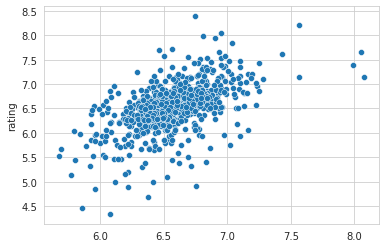

In [ ]:
features = [
    'clearanceTotal',
    'passLongBallAccurate',
    'passLongBallInaccurate',
    'shortPassAccurate',
    'shortPassInaccurate',
    
    'saveSixYardBox',
    'savePenaltyArea',
    'saveTotal',
    
    'keyPassLong',


    'goalOwn',
    
    'duelAerialLost',
    'duelAerialWon',
    'tackleWonTotal',
    'tackleTotalAttempted',

    "assist",
    
    'shotHead',
    'shotOnTarget',
    'shotPenaltyArea',
    'shotRightFoot',
    'penaltyTaken',
    'keyPassOther'
]
posCode = 'GK'
x_train = train_data[posCode][features]


y_train = train_data[posCode].rating

x_test = test_data[posCode][features]


y_test = test_data[posCode].rating

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(mae(y_pred, y_test))
print(model.coef_)
sns.scatterplot(y_pred, y_test)

# Combinate all the features


## Prepare data for all positions

In [ ]:
quantile_name = ["50-75", "75-90","90-100"]
dc = pd.concat({
    "50-75": df_q_50_75.loc['DC'],
    "75-90": df_q_75_90.loc['DC'], 
    "90-100": df_q_90_100.loc['DC']
}, axis = 1)
dc.columns.name = 'DC'
dc['50-100'] = dc.sum(axis = 1)
dc

DC,50-75,75-90,90-100,50-100
challengeLost,,,,
duelAerialLost,0.478145,0.203461,0.059241,0.740848
duelAerialTotal,0.309519,0.356113,0.194586,0.860217
duelAerialWon,0.194808,0.372088,0.278678,0.845574
assistCross,0.000000,0.002884,0.021744,0.024628
assistCorner,0.000000,0.000000,0.002441,0.002441
...,...,...,...,...
shotOboxTotal,0.066119,0.018194,0.004659,0.088973
shotsTotal,0.031728,0.010206,0.003550,0.045485
tackleWonTotal,0.479033,0.061016,0.051697,0.591746


In [ ]:
features = list(dc.loc[dc['50-100'] > 0.06].index)
del_features = [
    'goalTotal',
    
    'offsideGiven',
    'duelAerialLost',
    'duelAerialWon',
    'duelAerialTotal'

]
for feature in del_features:
    features.remove(feature)
print(len(features), features)

47 ['assistOther', 'assist', 'passCrossBlockedDefensive', 'outfielderBlockedPass', 'outfielderBlock', 'yellowCard', 'redCard', 'clearanceTotal', 'dribbleWon', 'foulGiven', 'foulCommitted', 'goalRightFoot', 'goalLeftFoot', 'goalHead', 'goalSetPiece', 'goalNormal', 'goalOwn', 'goalSixYardBox', 'goalPenaltyArea', 'interceptionAll', 'keyPassLong', 'keyPassCross', 'keyPassThroughball', 'keyPassOther', 'passTotal', 'passLongBallAccurate', 'passLongBallInaccurate', 'shortPassAccurate', 'shortPassInaccurate', 'passFreekickAccurate', 'passFreekickInaccurate', 'passCrossInaccurate', 'passCrossAccurate', 'shotOnTarget', 'shotOffTarget', 'shotOnPost', 'shotBlocked', 'shotRightFoot', 'shotLeftFoot', 'shotHead', 'shotSetPiece', 'shotSixYardBox', 'shotPenaltyArea', 'shotOboxTotal', 'tackleWonTotal', 'tackleTotalAttempted', 'challengeLost']


In [ ]:
def quantile_analyse(posCode, del_features = [], add_features = []):
    quantile_name = ["50-75", "75-90","90-100"]
    dc = pd.concat({
        "50-75": df_q_50_75.loc[posCode],
        "75-90": df_q_75_90.loc[posCode], 
        "90-100": df_q_90_100.loc[posCode]
    }, axis = 1)
    dc.columns.name = posCode
    dc['50-100'] = dc.sum(axis = 1)
    
    
    features = set(dc.loc[dc['50-100'] > 0.05].index)
   
    for feature in del_features:
        features.remove(feature)
        
    for feature in add_features:
        features.add(feature)

    return features
    
quantile_chosen_features_of_position = {posCode: quantile_analyse(posCode) for posCode in positionCodes}

## Compose all analysis features

In [ ]:
chosen_features_of_position = {}
for posCode in positionCodes:
    chosen_features_of_position[posCode] = set.union(
        quantile_chosen_features_of_position[posCode],
        kmeans_chosen_features_of_position[posCode],
        mi_chosen_features_of_position[posCode]
    )

chosen_features_of_position

{'FW': {'assist',
  'assistCorner',
  'assistCross',
  'assistFreekick',
  'assistOther',
  'assistThroughball',
  'assistThrowin',
  'challengeLost',
  'clearanceTotal',
  'dispossessed',
  'dribbleLost',
  'dribbleTotal',
  'dribbleWon',
  'duelAerialLost',
  'duelAerialTotal',
  'duelAerialWon',
  'foulCommitted',
  'foulGiven',
  'goalCounter',
  'goalHead',
  'goalLeftFoot',
  'goalNormal',
  'goalObox',
  'goalObp',
  'goalOpenPlay',
  'goalOwn',
  'goalPenaltyArea',
  'goalRightFoot',
  'goalSetPiece',
  'goalSixYardBox',
  'goalTotal',
  'interceptionAll',
  'keyPassCorner',
  'keyPassCross',
  'keyPassFreekick',
  'keyPassLong',
  'keyPassOther',
  'keyPassShort',
  'keyPassThroughball',
  'keyPassThrowin',
  'keyPassesTotal',
  'offsideGiven',
  'outfielderBlock',
  'outfielderBlockedPass',
  'passCornerAccurate',
  'passCornerInaccurate',
  'passCrossAccurate',
  'passCrossBlockedDefensive',
  'passCrossInaccurate',
  'passFreekickAccurate',
  'passFreekickInaccurate',
  'pa

In [ ]:
mi_chosen_features_of_position

In [ ]:
chosen2_features_of_position

In [ ]:
difference = {}
for posCode in positionCodes:
    print(chosen_features_of_position[posCode].difference(chosen2_features_of_position[posCode]))
    print(posCode)
    #print(chosen_features_of_position[posCode])
    #print(chosen2_features_of_position[posCode])

In [ ]:
print(difference)

In [ ]:
{1, 2}.difference({1})

# Building model for each positions

In [ ]:
class LRwithAnalysis():
    def __init__(self, chosen_features_of_position):
        self.chosen_features = chosen_features_of_position
        self.positionCodes = chosen_features_of_position.keys()
        self.sub_lr = {posCode: Ridge() for posCode in positionCodes}

    def categorize_df(self, df):
        position_df = {}
        for posCode in self.positionCodes:
            position_df[posCode] = df.loc[df.positionCode == posCode]
        return position_df

    def getData(self, position_df):
        x, y = {}, {}
        for posCode in self.positionCodes:
            features = self.chosen_features[posCode]
            x[posCode] = position_df[posCode][features]
            y[posCode] = position_df[posCode].rating
    
        return x, y
    
    def fit(self, x_train, y_train):
        for posCode in positionCodes:
            self.sub_lr[posCode].fit(x_train[posCode], y_train[posCode])
        

    def predict(self, x_test):
        y_pred = {}
        for posCode in self.positionCodes:
            y_pred[posCode] = self.sub_lr[posCode].predict(x_test[posCode])
        return y_pred

    def flatten_dict_to_np_array(self, y_pred, y_test):
        y_pred_np = np.array([])
        y_test_np = np.array([])
        
        for posCode in self.positionCodes:
            y_pred_np = np.concatenate((y_pred_np, y_pred[posCode]), axis=None)
            y_test_np = np.concatenate((y_test_np, y_test[posCode]), axis=None)

        return y_pred_np, y_test_np

### Test on test set

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.04470585473014403


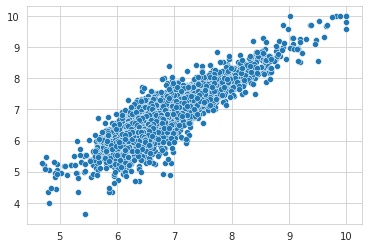

In [ ]:
model = LRwithAnalysis(chosen_features_of_position)

x_train, y_train = model.getData(train_data)
x_test, y_test = model.getData(test_data)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred, y_test = model.flatten_dict_to_np_array(y_pred, y_test)

y_pred = np.array([y if y <= 10 else 10 for y in y_pred])

sns.scatterplot(y_pred, y_test)
print(mse(y_pred, y_test))

In [ ]:
0.14683279435808827


## Calculate accurary on training set

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.1377598952395576


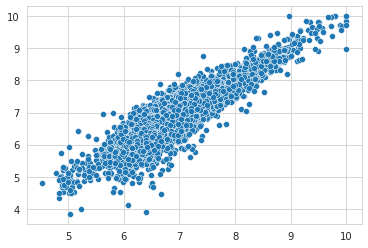

In [ ]:
x_train, y_train = model.getData(train_data)
y_pred = model.predict(x_train)
y_pred, y_train = model.flatten_dict_to_np_array(y_pred, y_train)

y_pred = np.array([y if y <= 10 else 10 for y in y_pred])

sns.scatterplot(y_pred, y_train)
print(mae(y_pred, y_train))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.03801324857714054


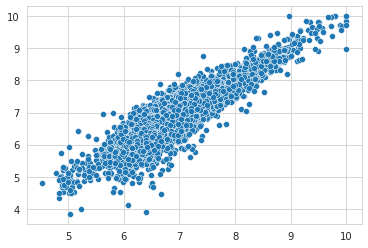

In [ ]:
x_train, y_train = model.getData(train_data)
y_pred = model.predict(x_train)
y_pred, y_train = model.flatten_dict_to_np_array(y_pred, y_train)

y_pred = np.array([y if y <= 10 else 10 for y in y_pred])

sns.scatterplot(y_pred, y_train)
print(mse(y_pred, y_train))